In [1]:
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm

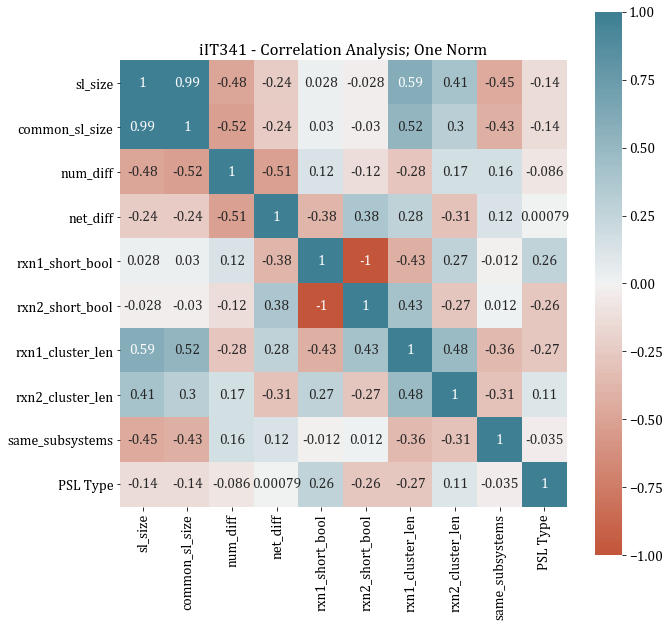

<Figure size 432x288 with 0 Axes>

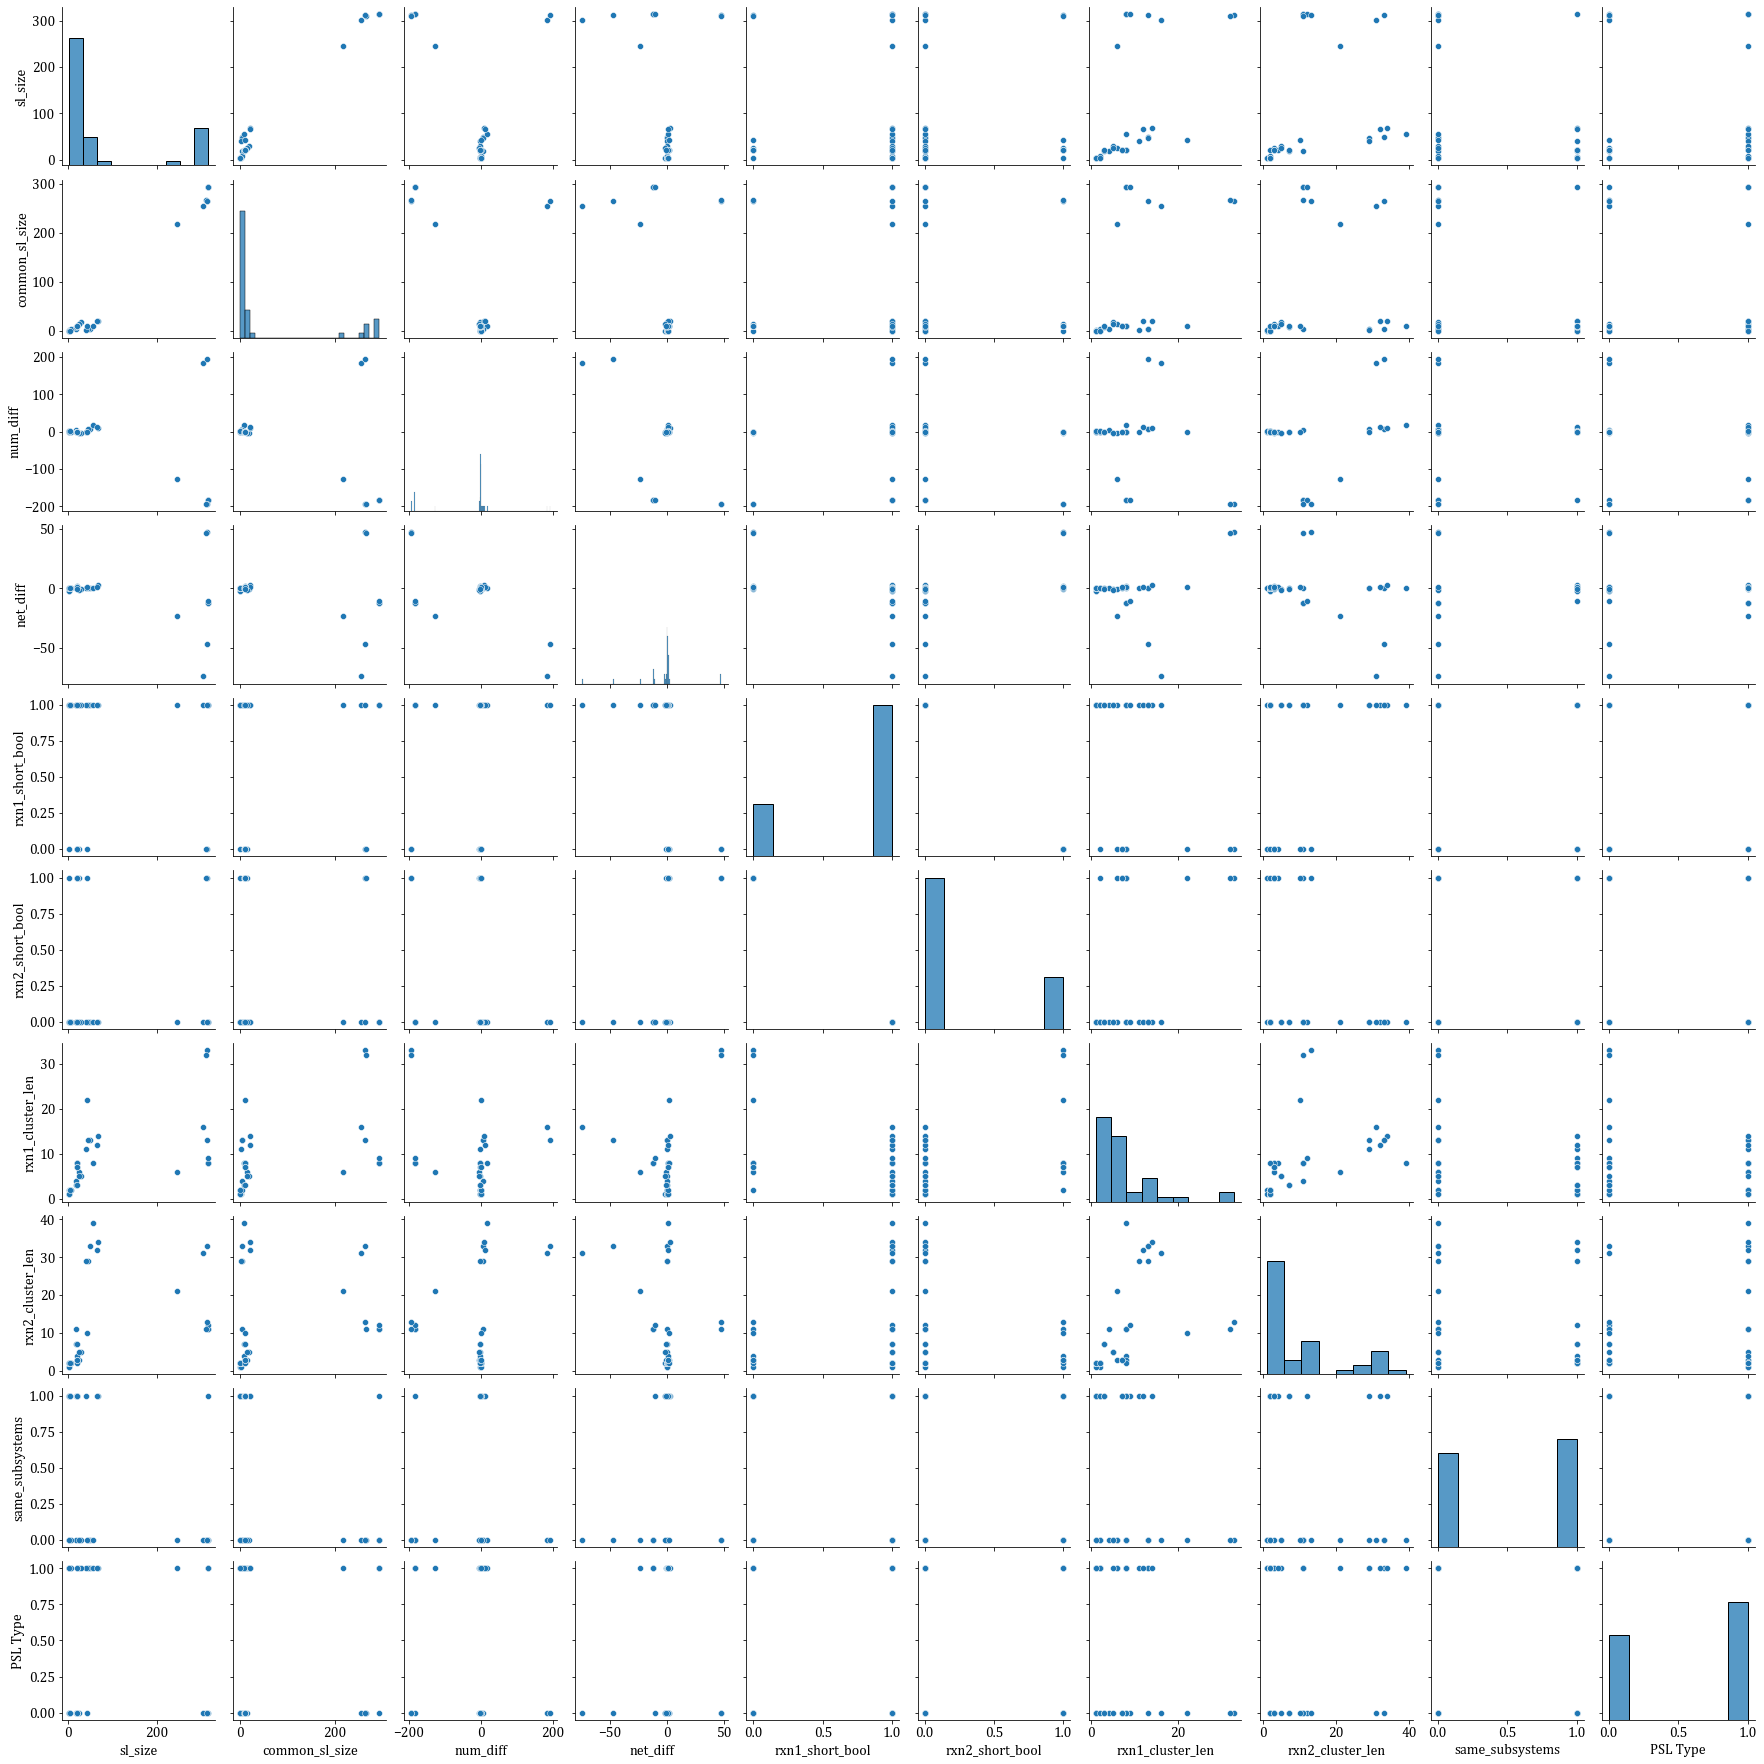

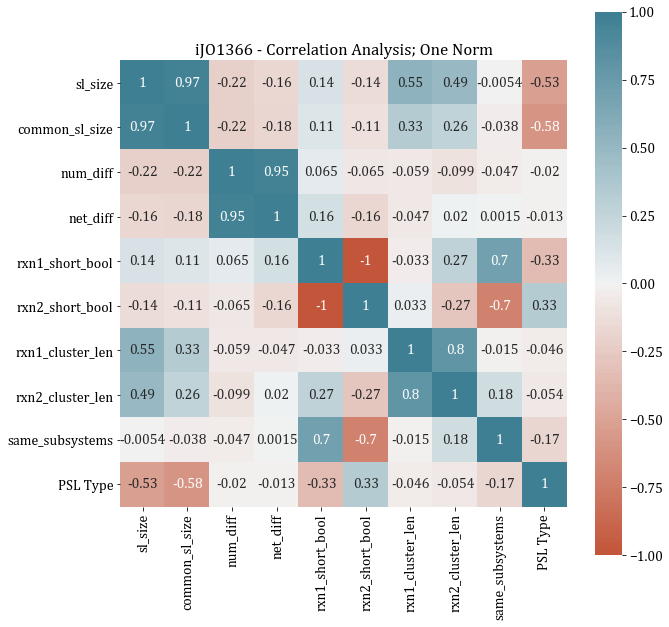

<Figure size 432x288 with 0 Axes>

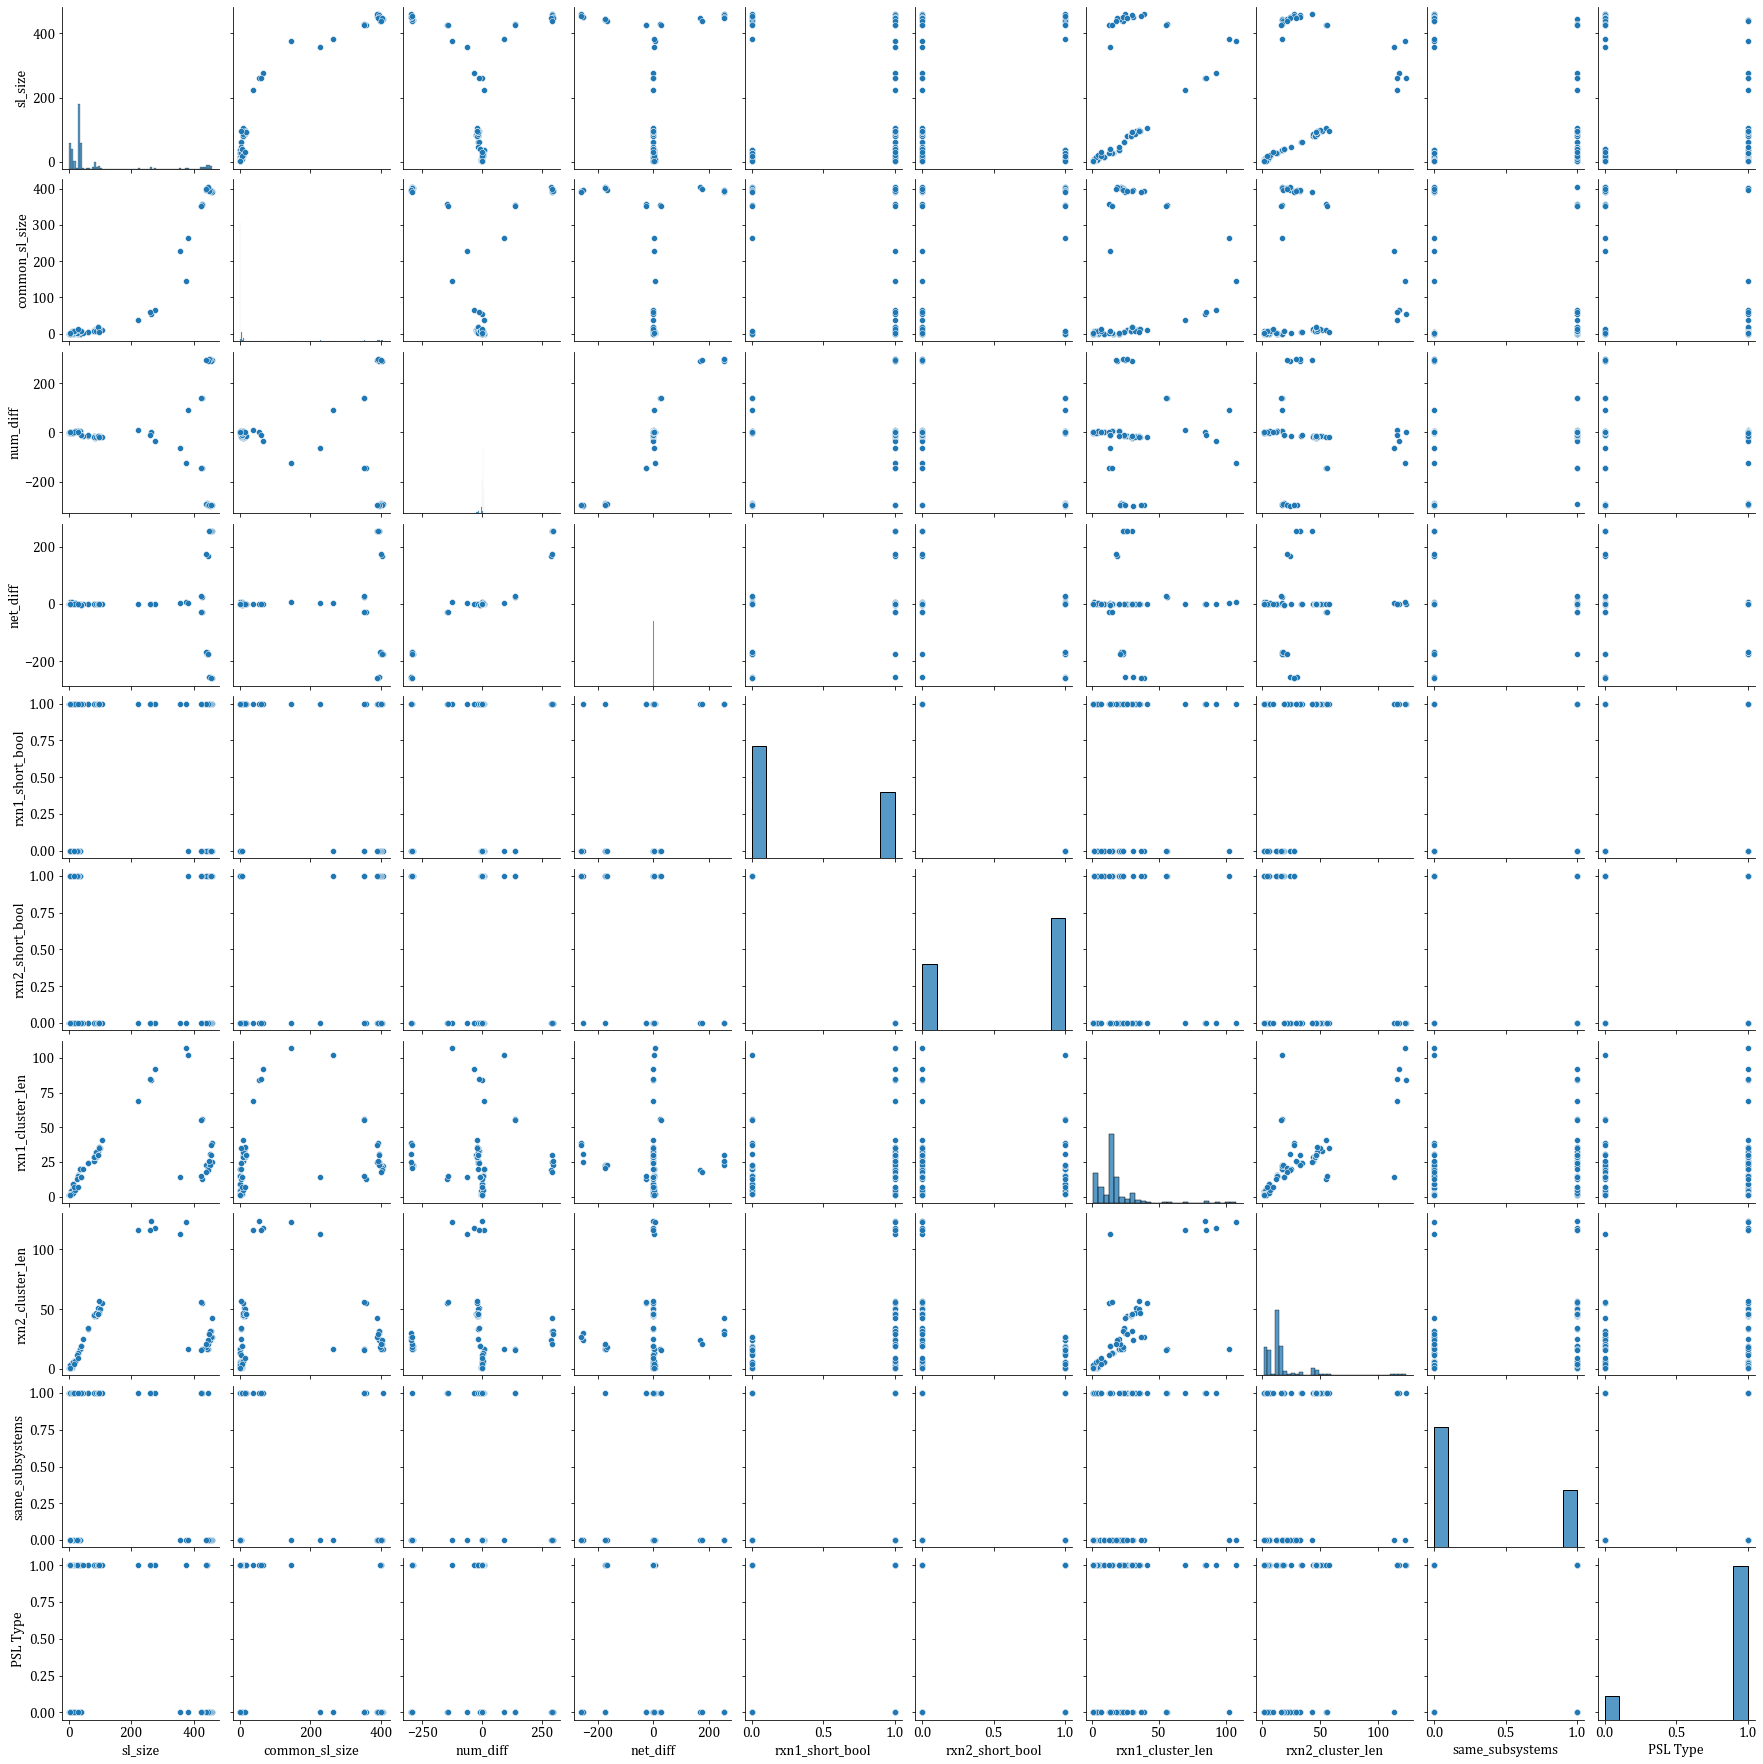

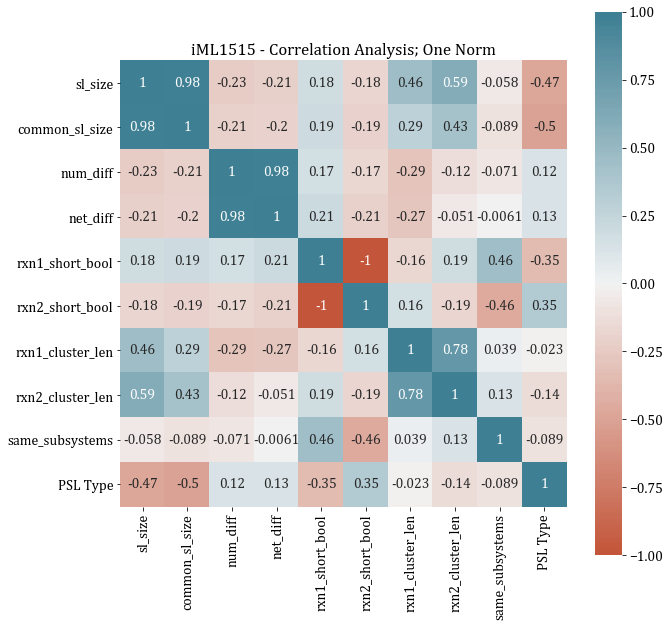

<Figure size 432x288 with 0 Axes>

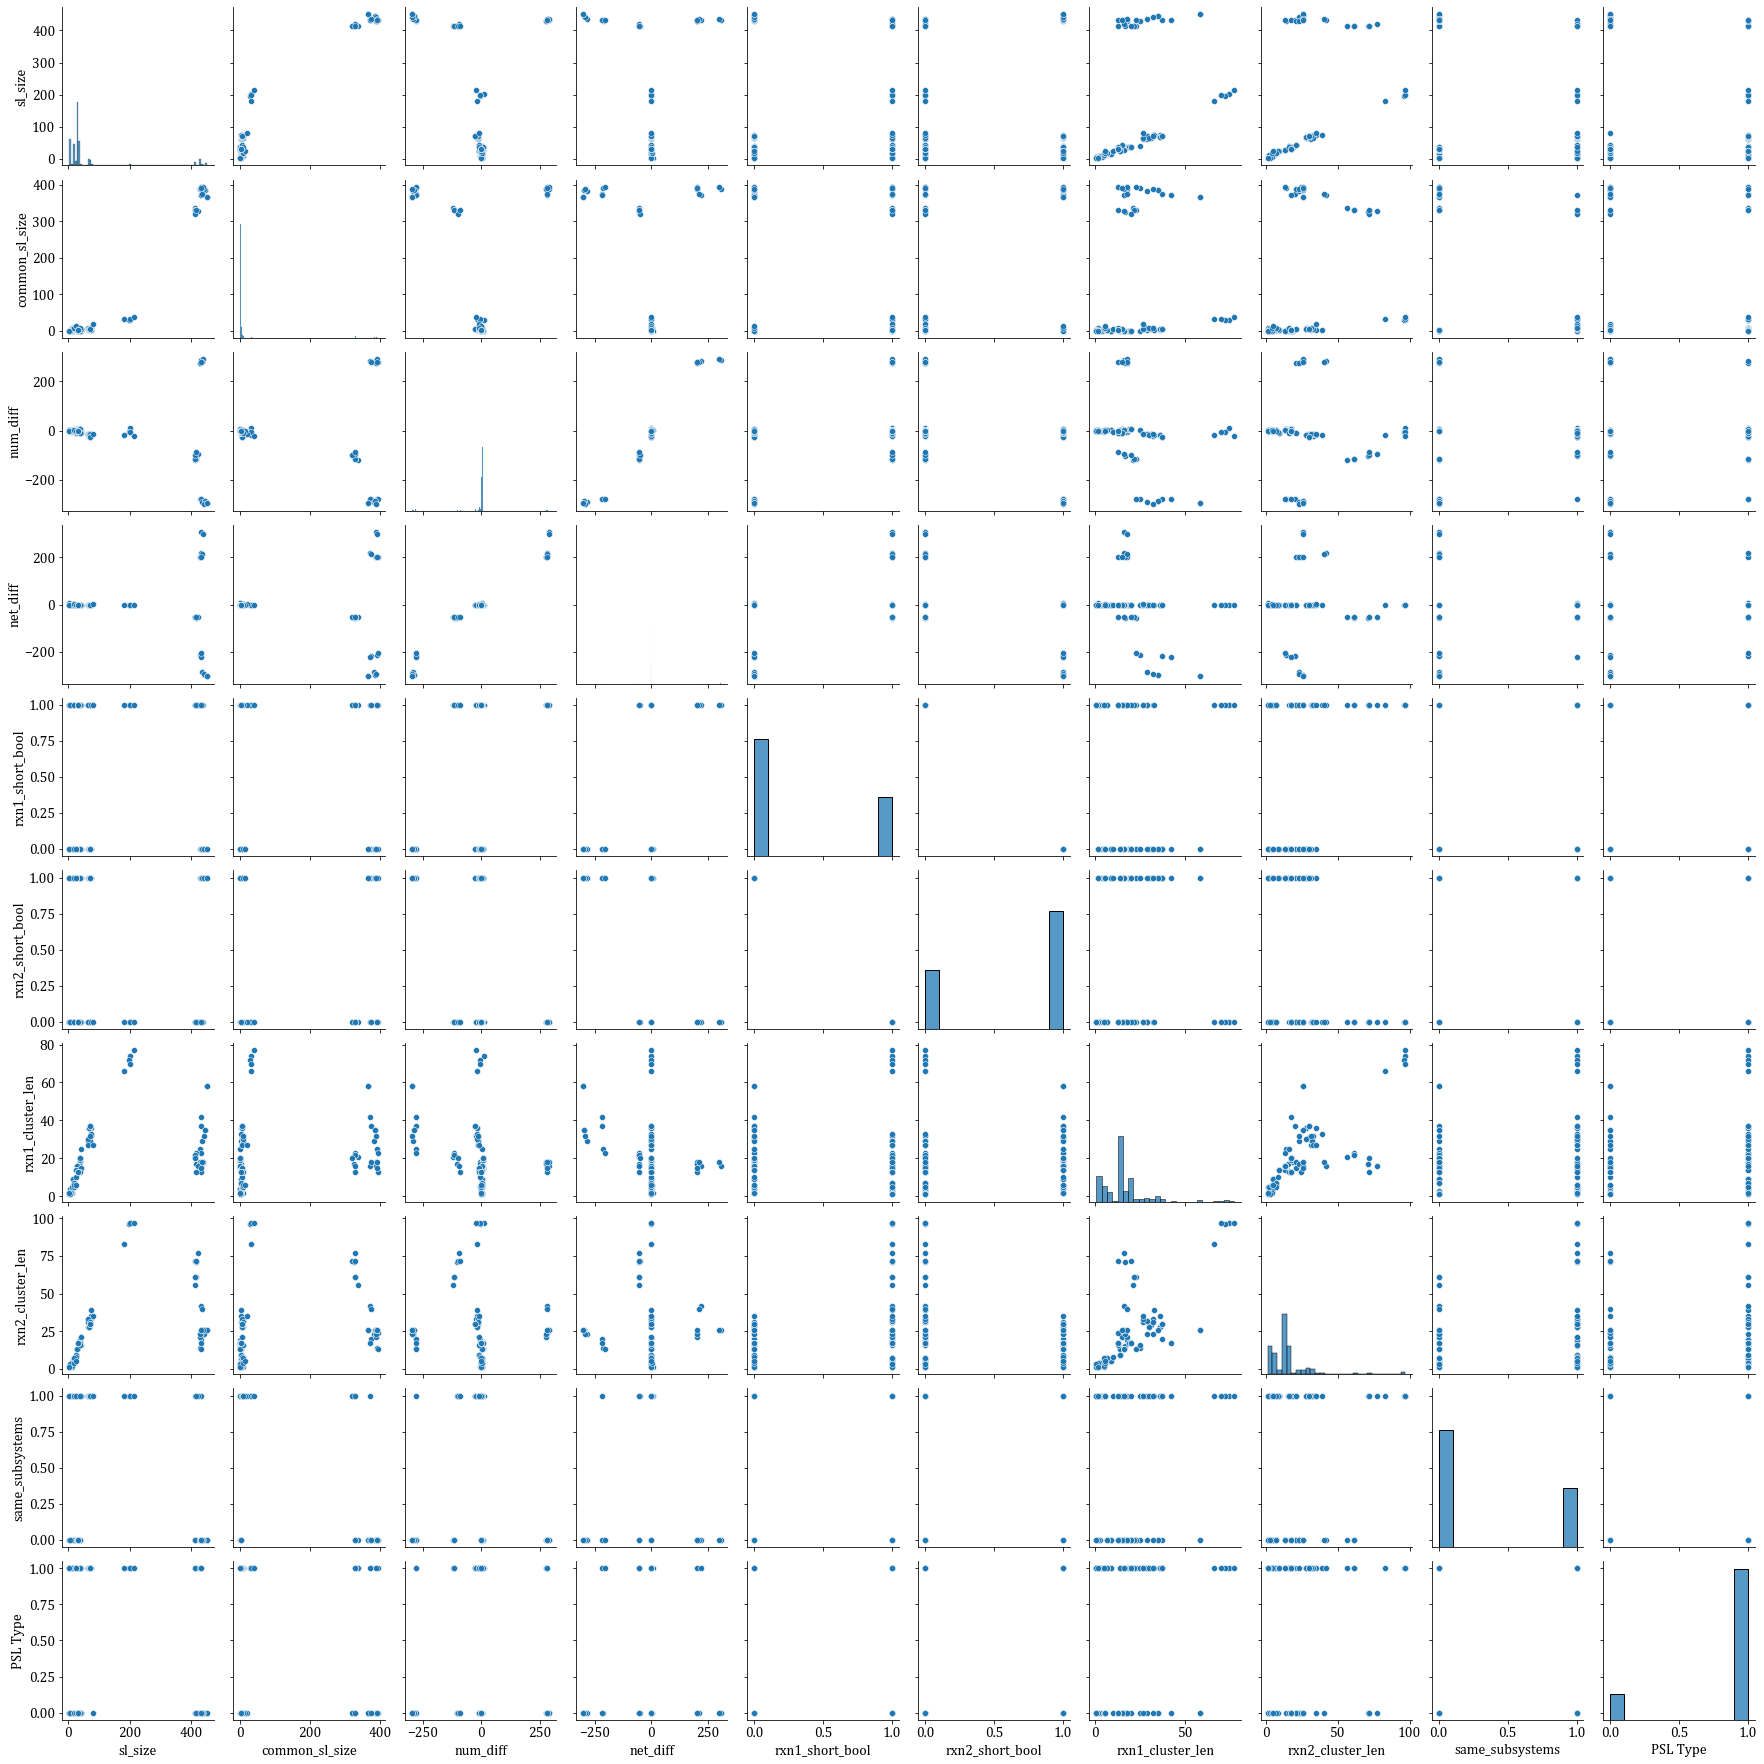

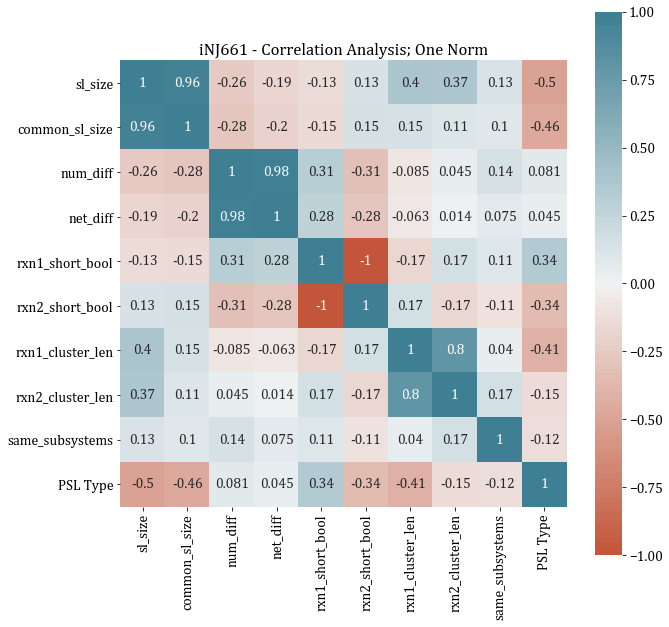

<Figure size 432x288 with 0 Axes>

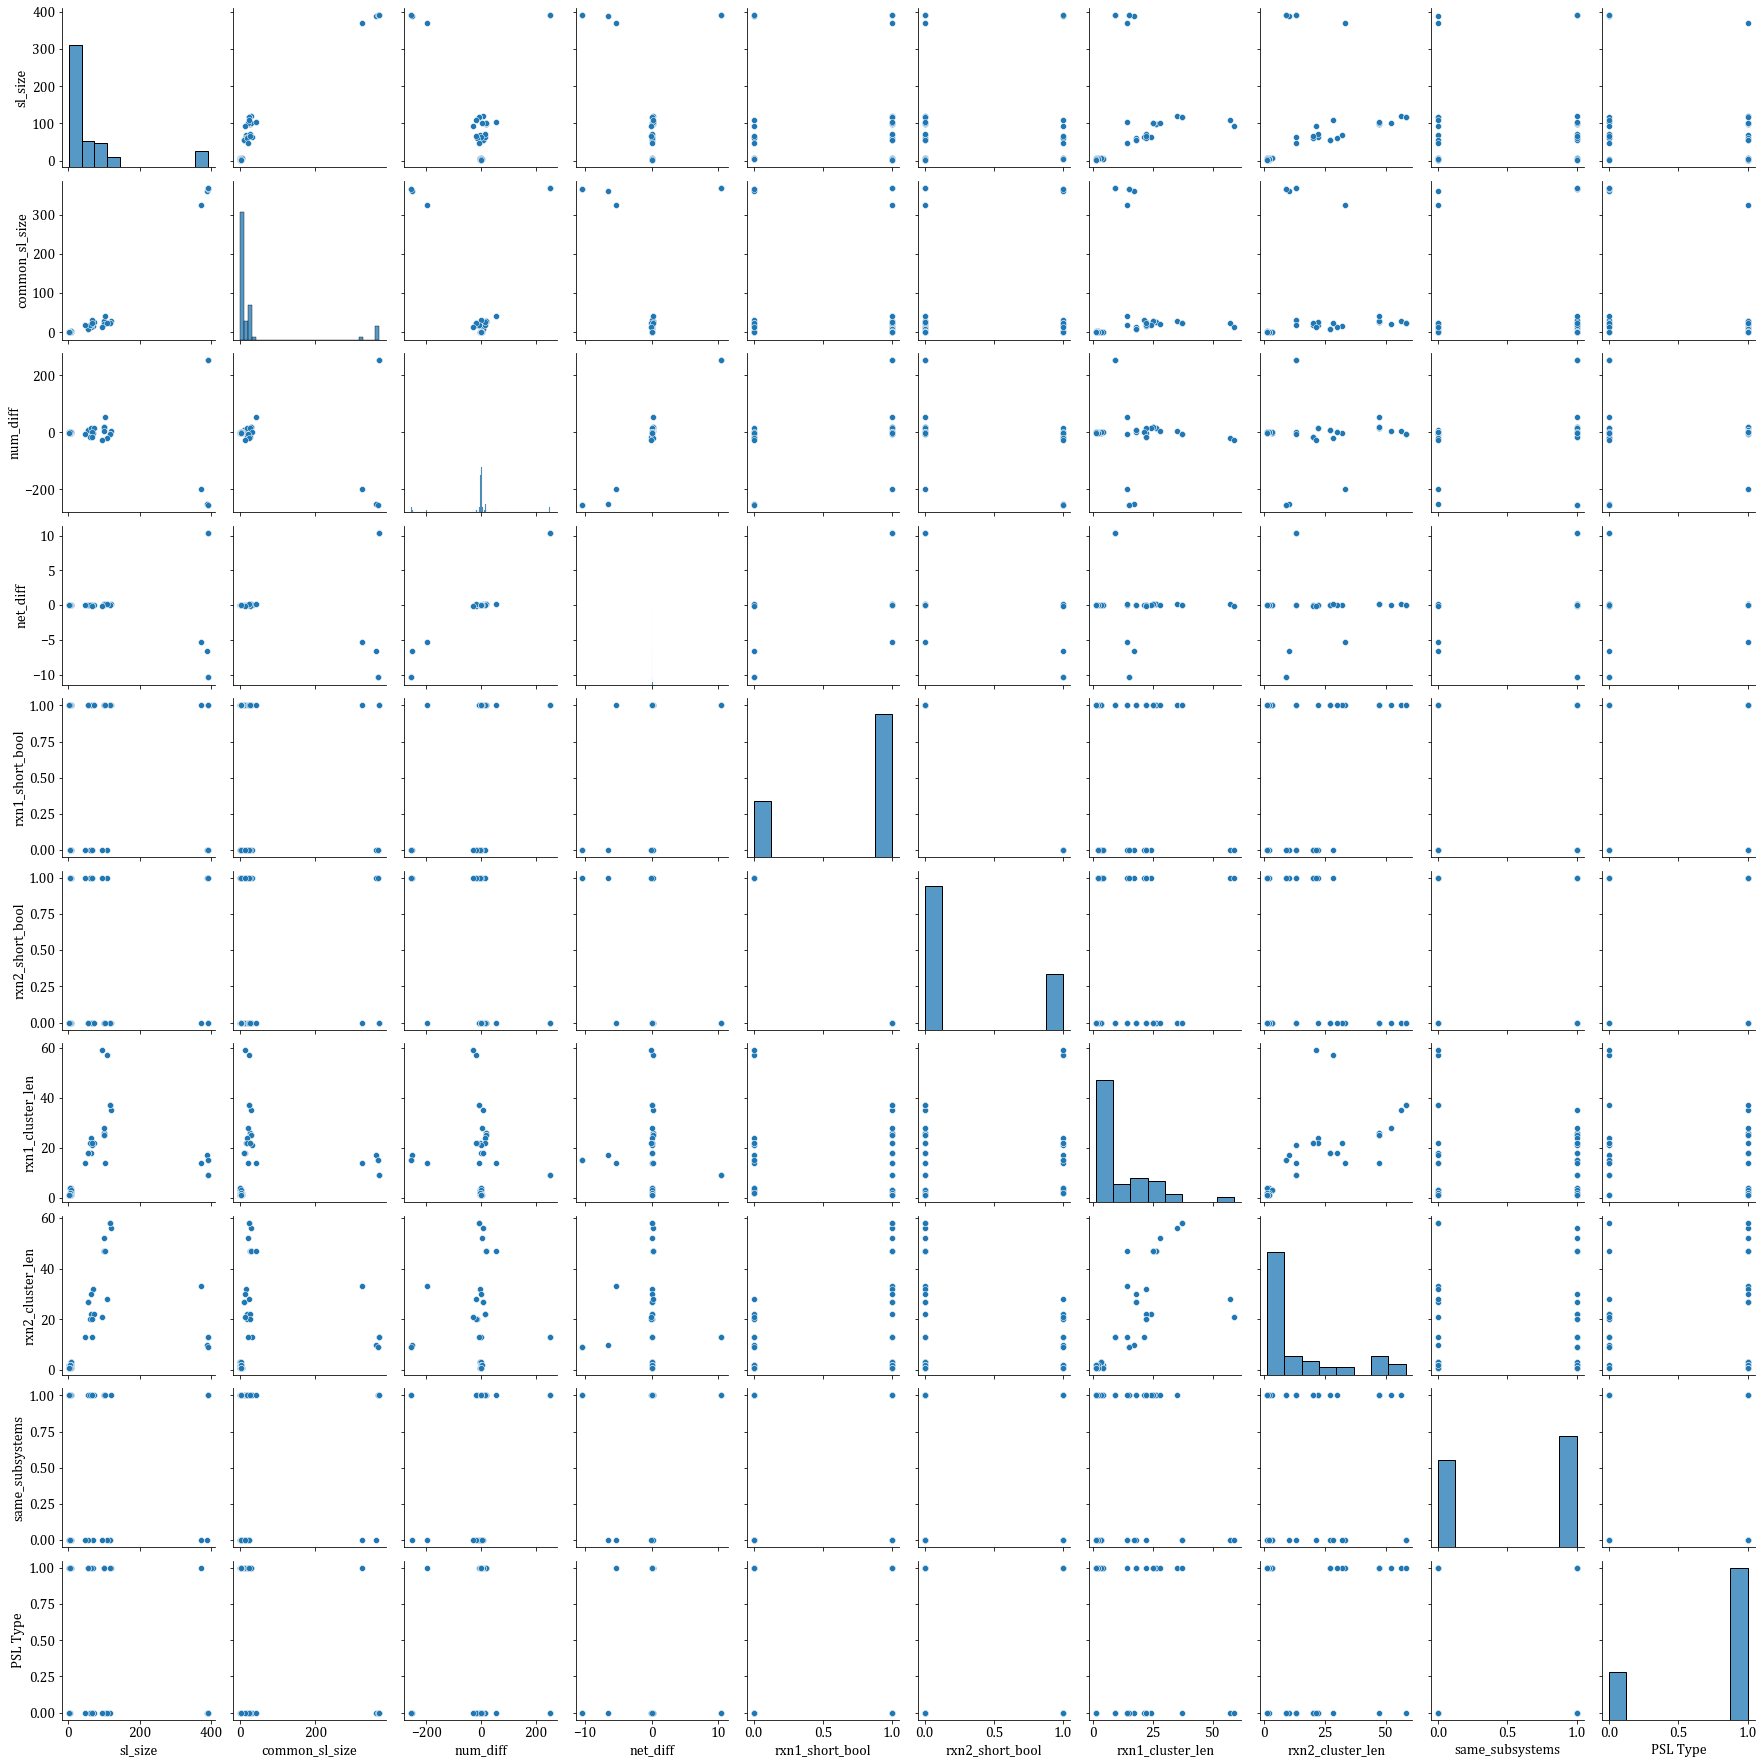

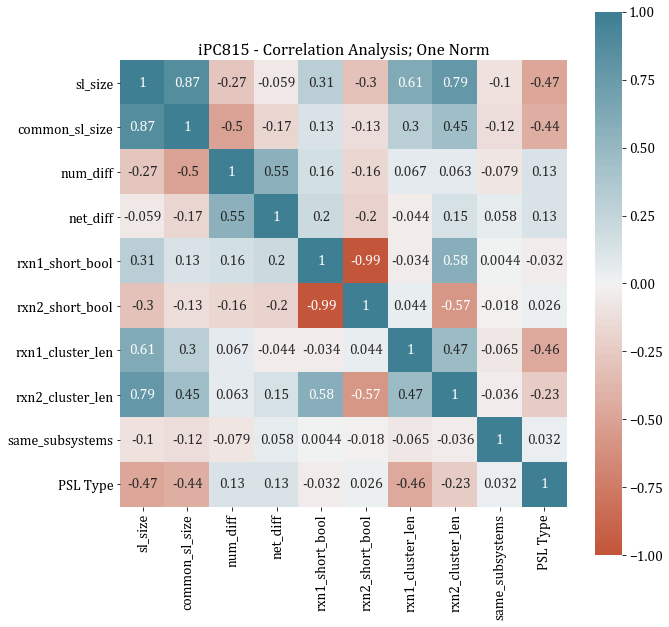

<Figure size 432x288 with 0 Axes>

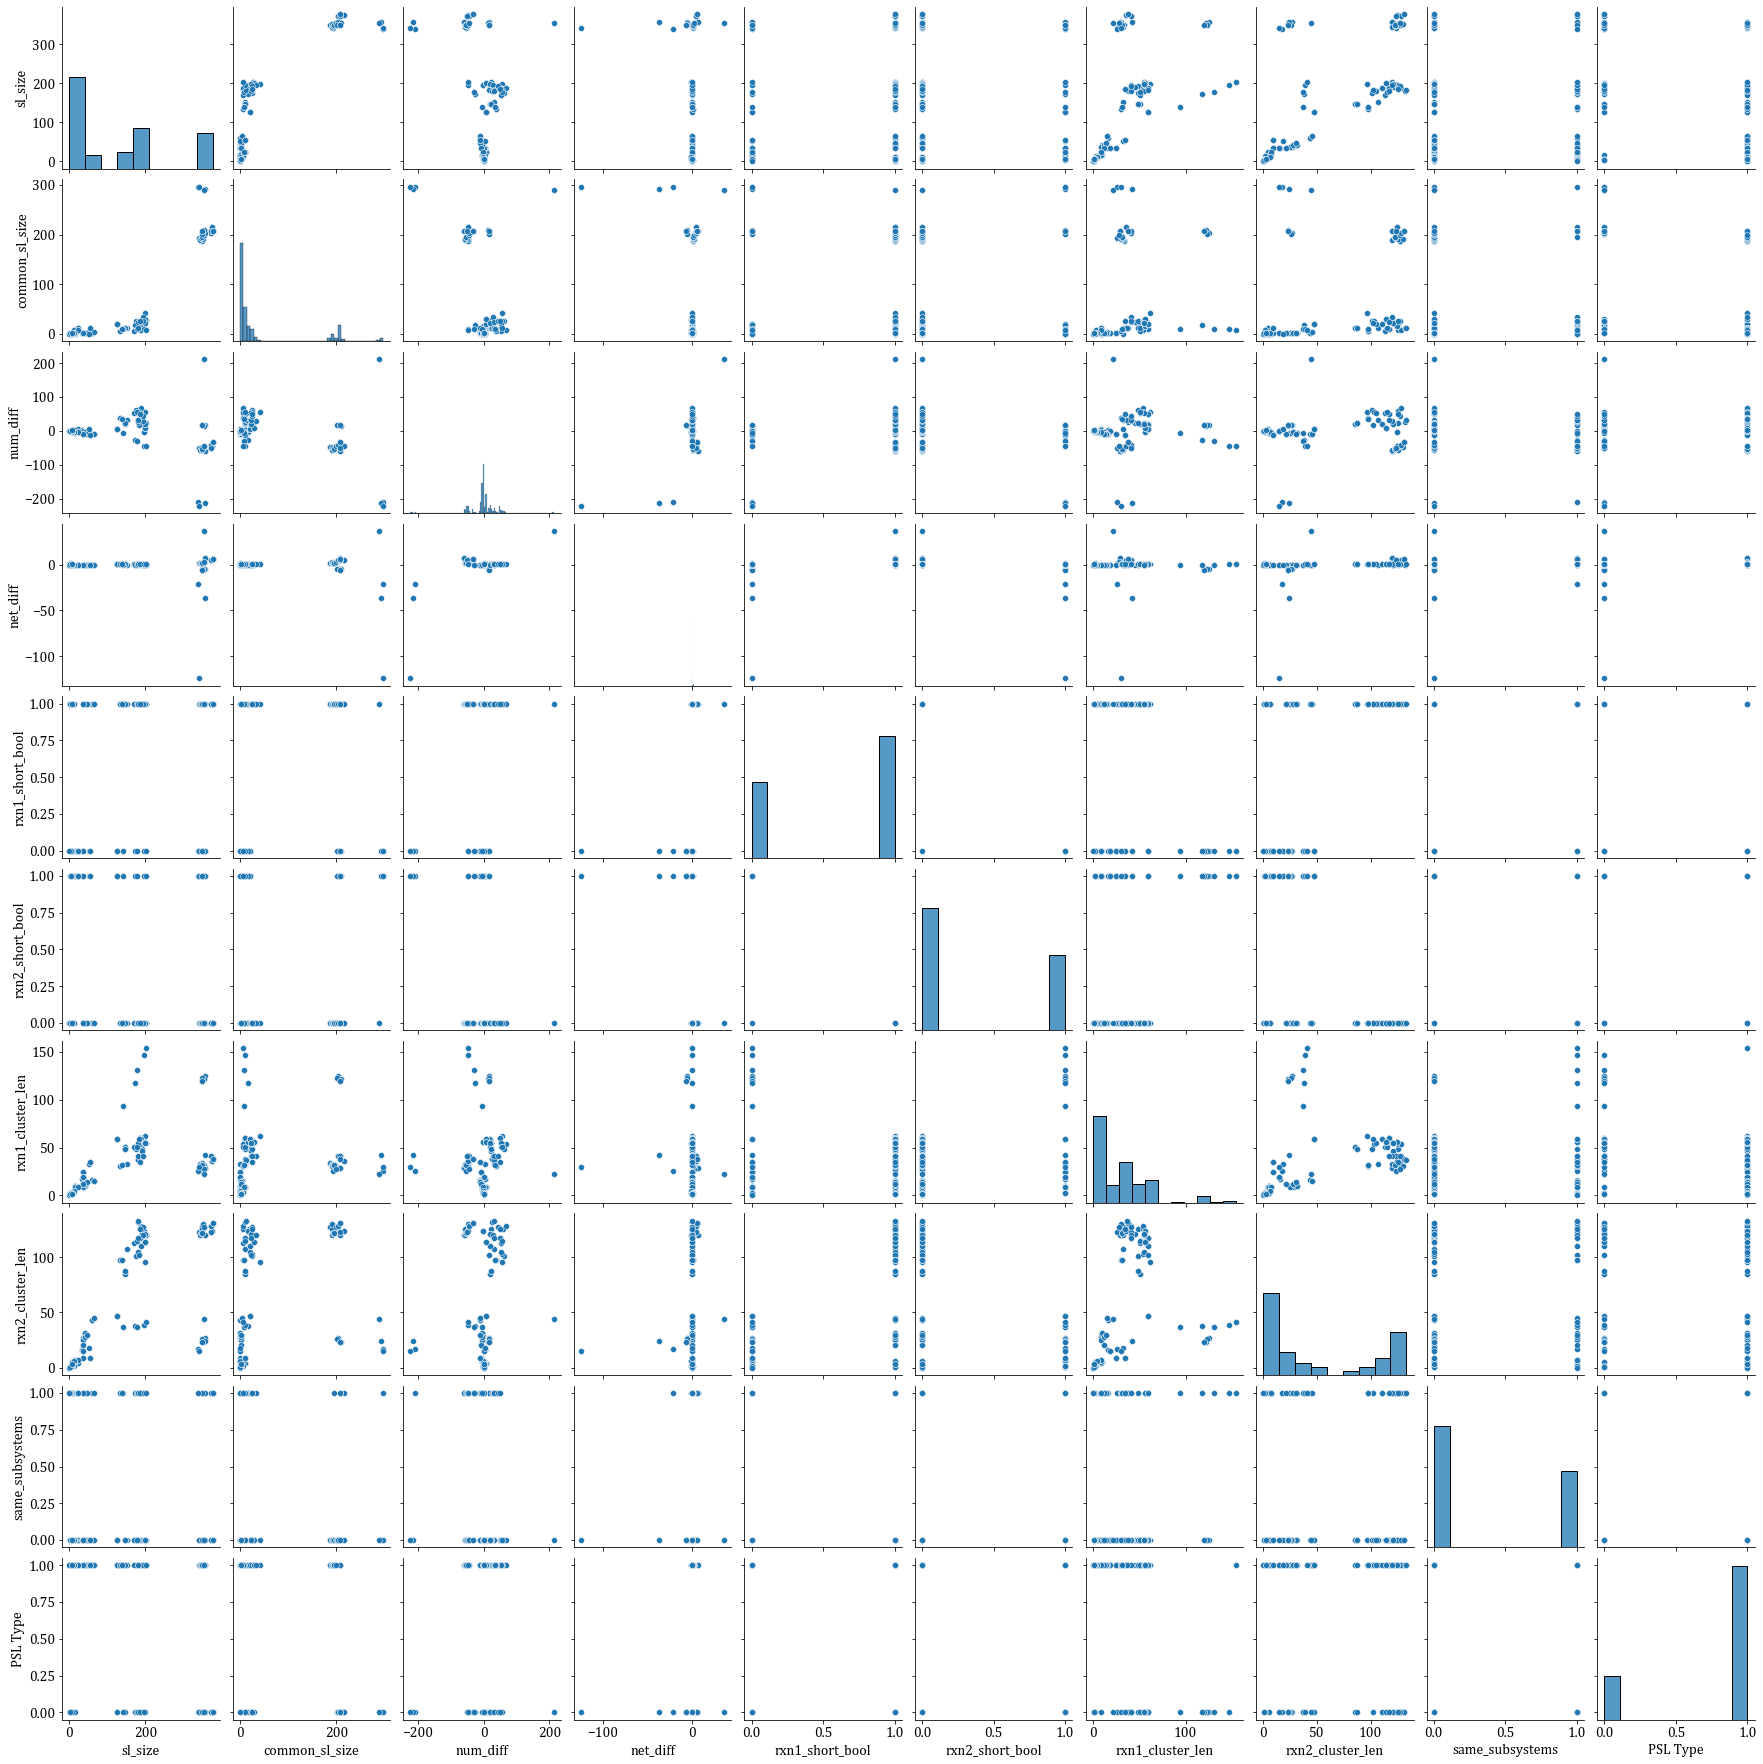

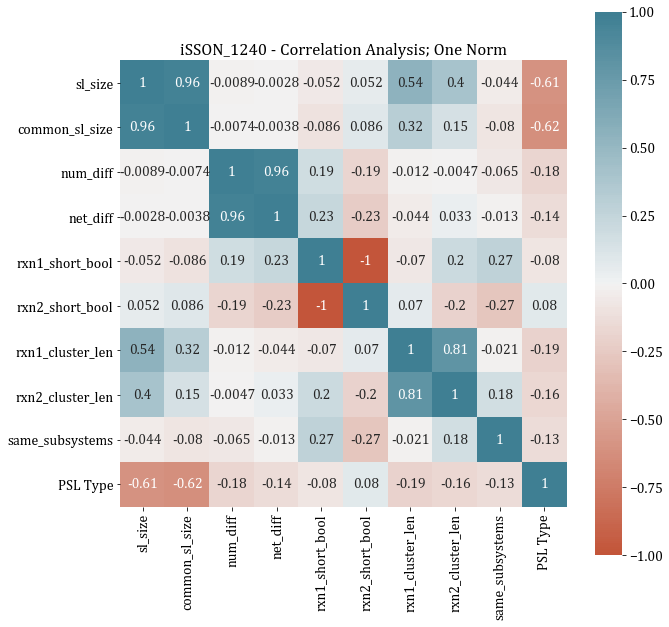

<Figure size 432x288 with 0 Axes>

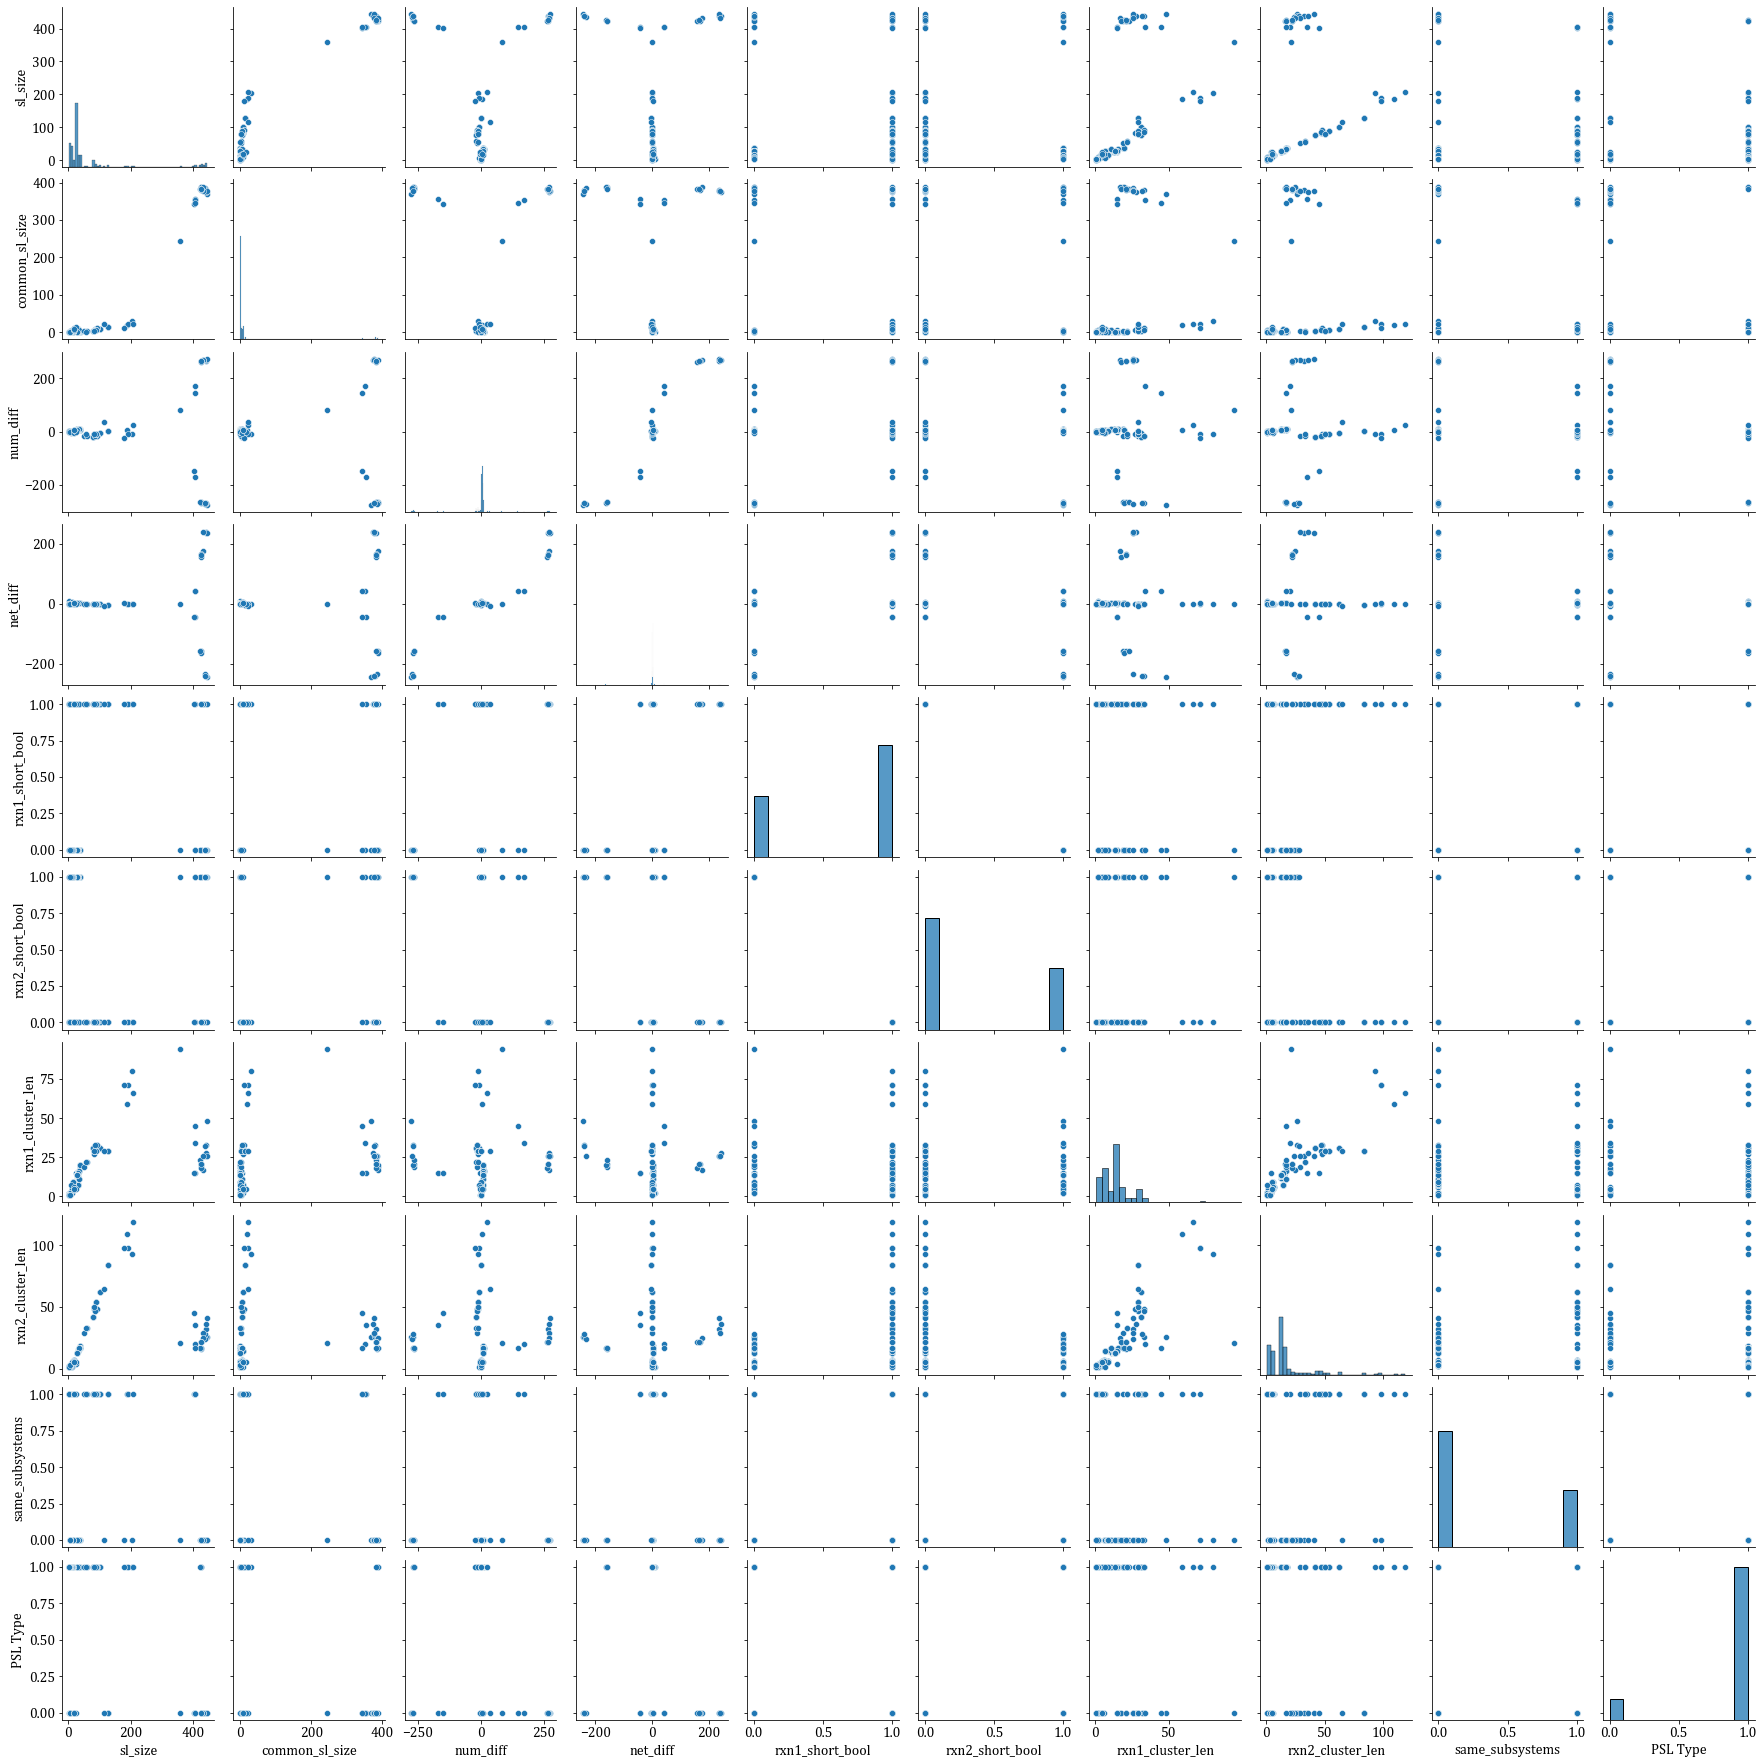

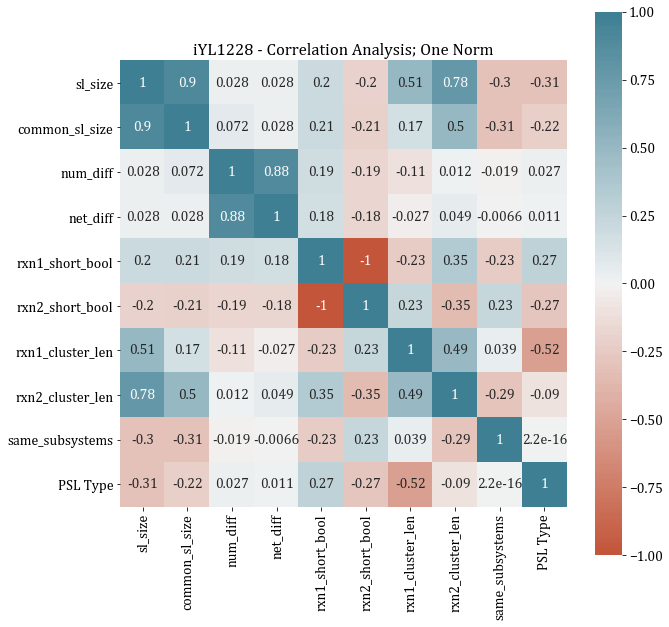

<Figure size 432x288 with 0 Axes>

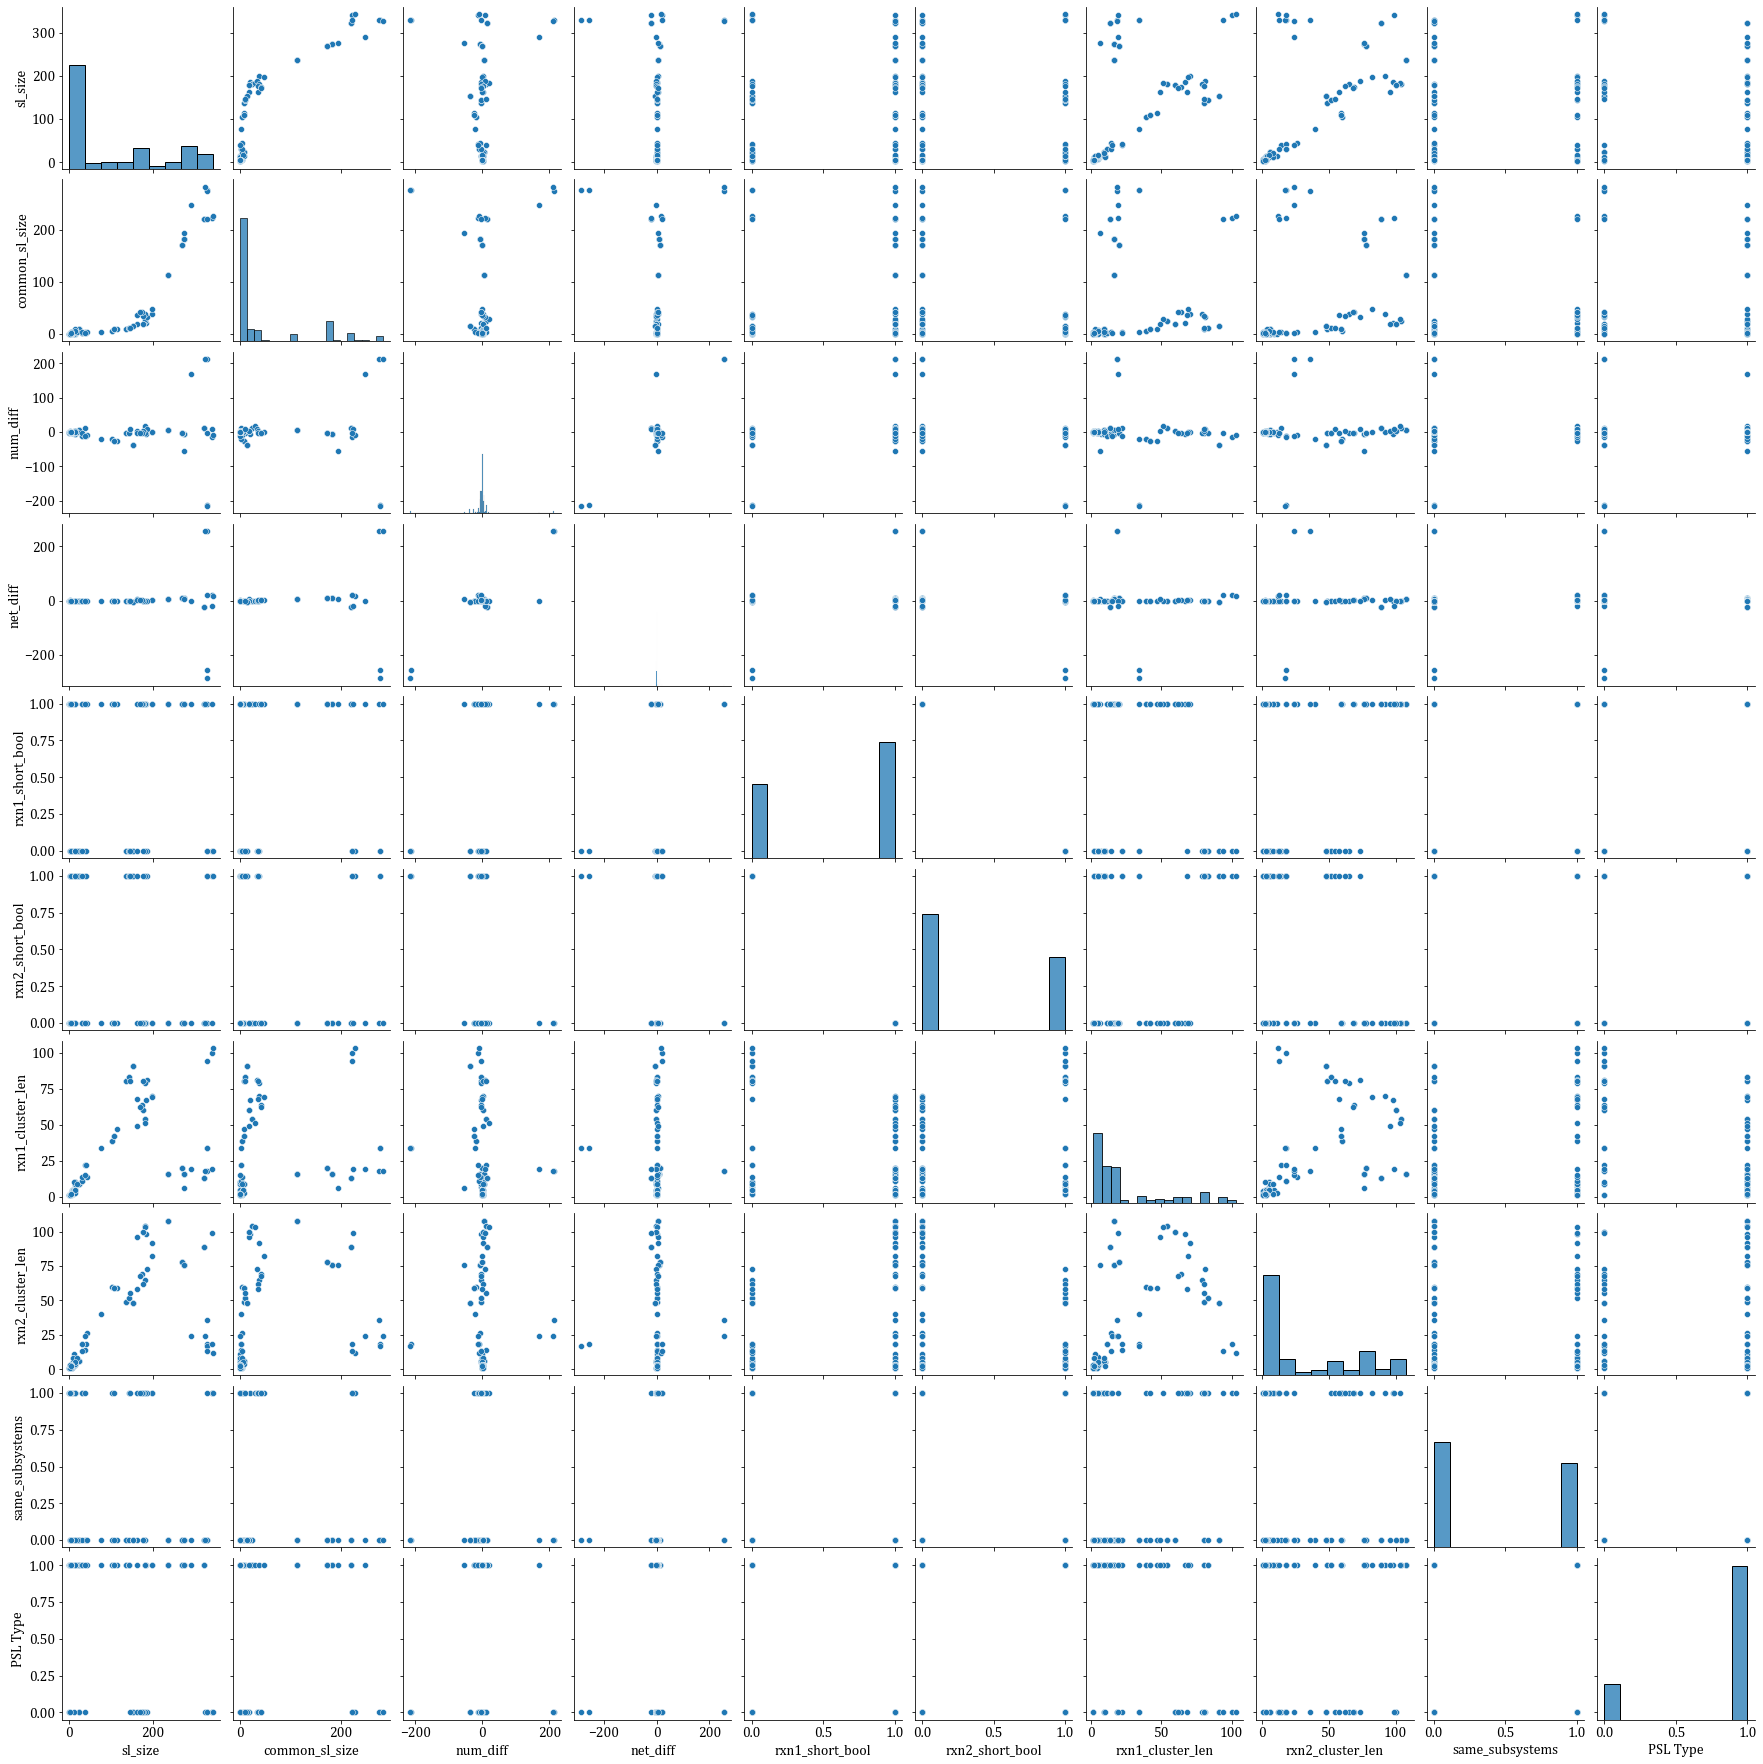

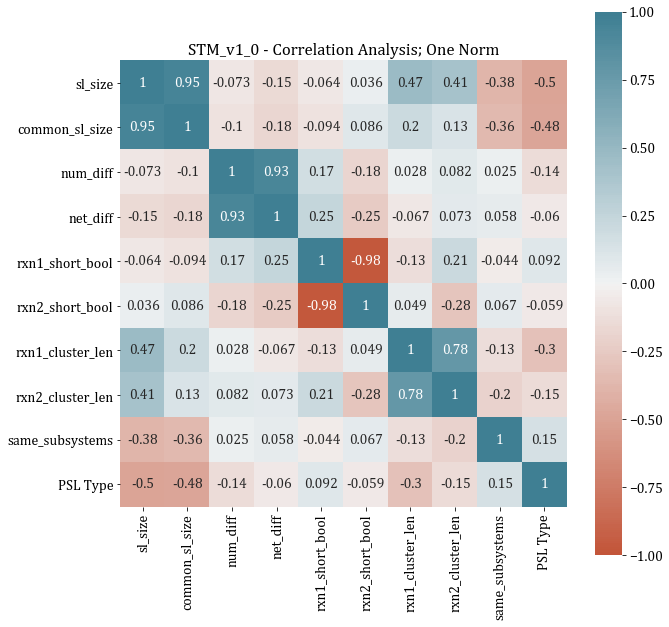

<Figure size 432x288 with 0 Axes>

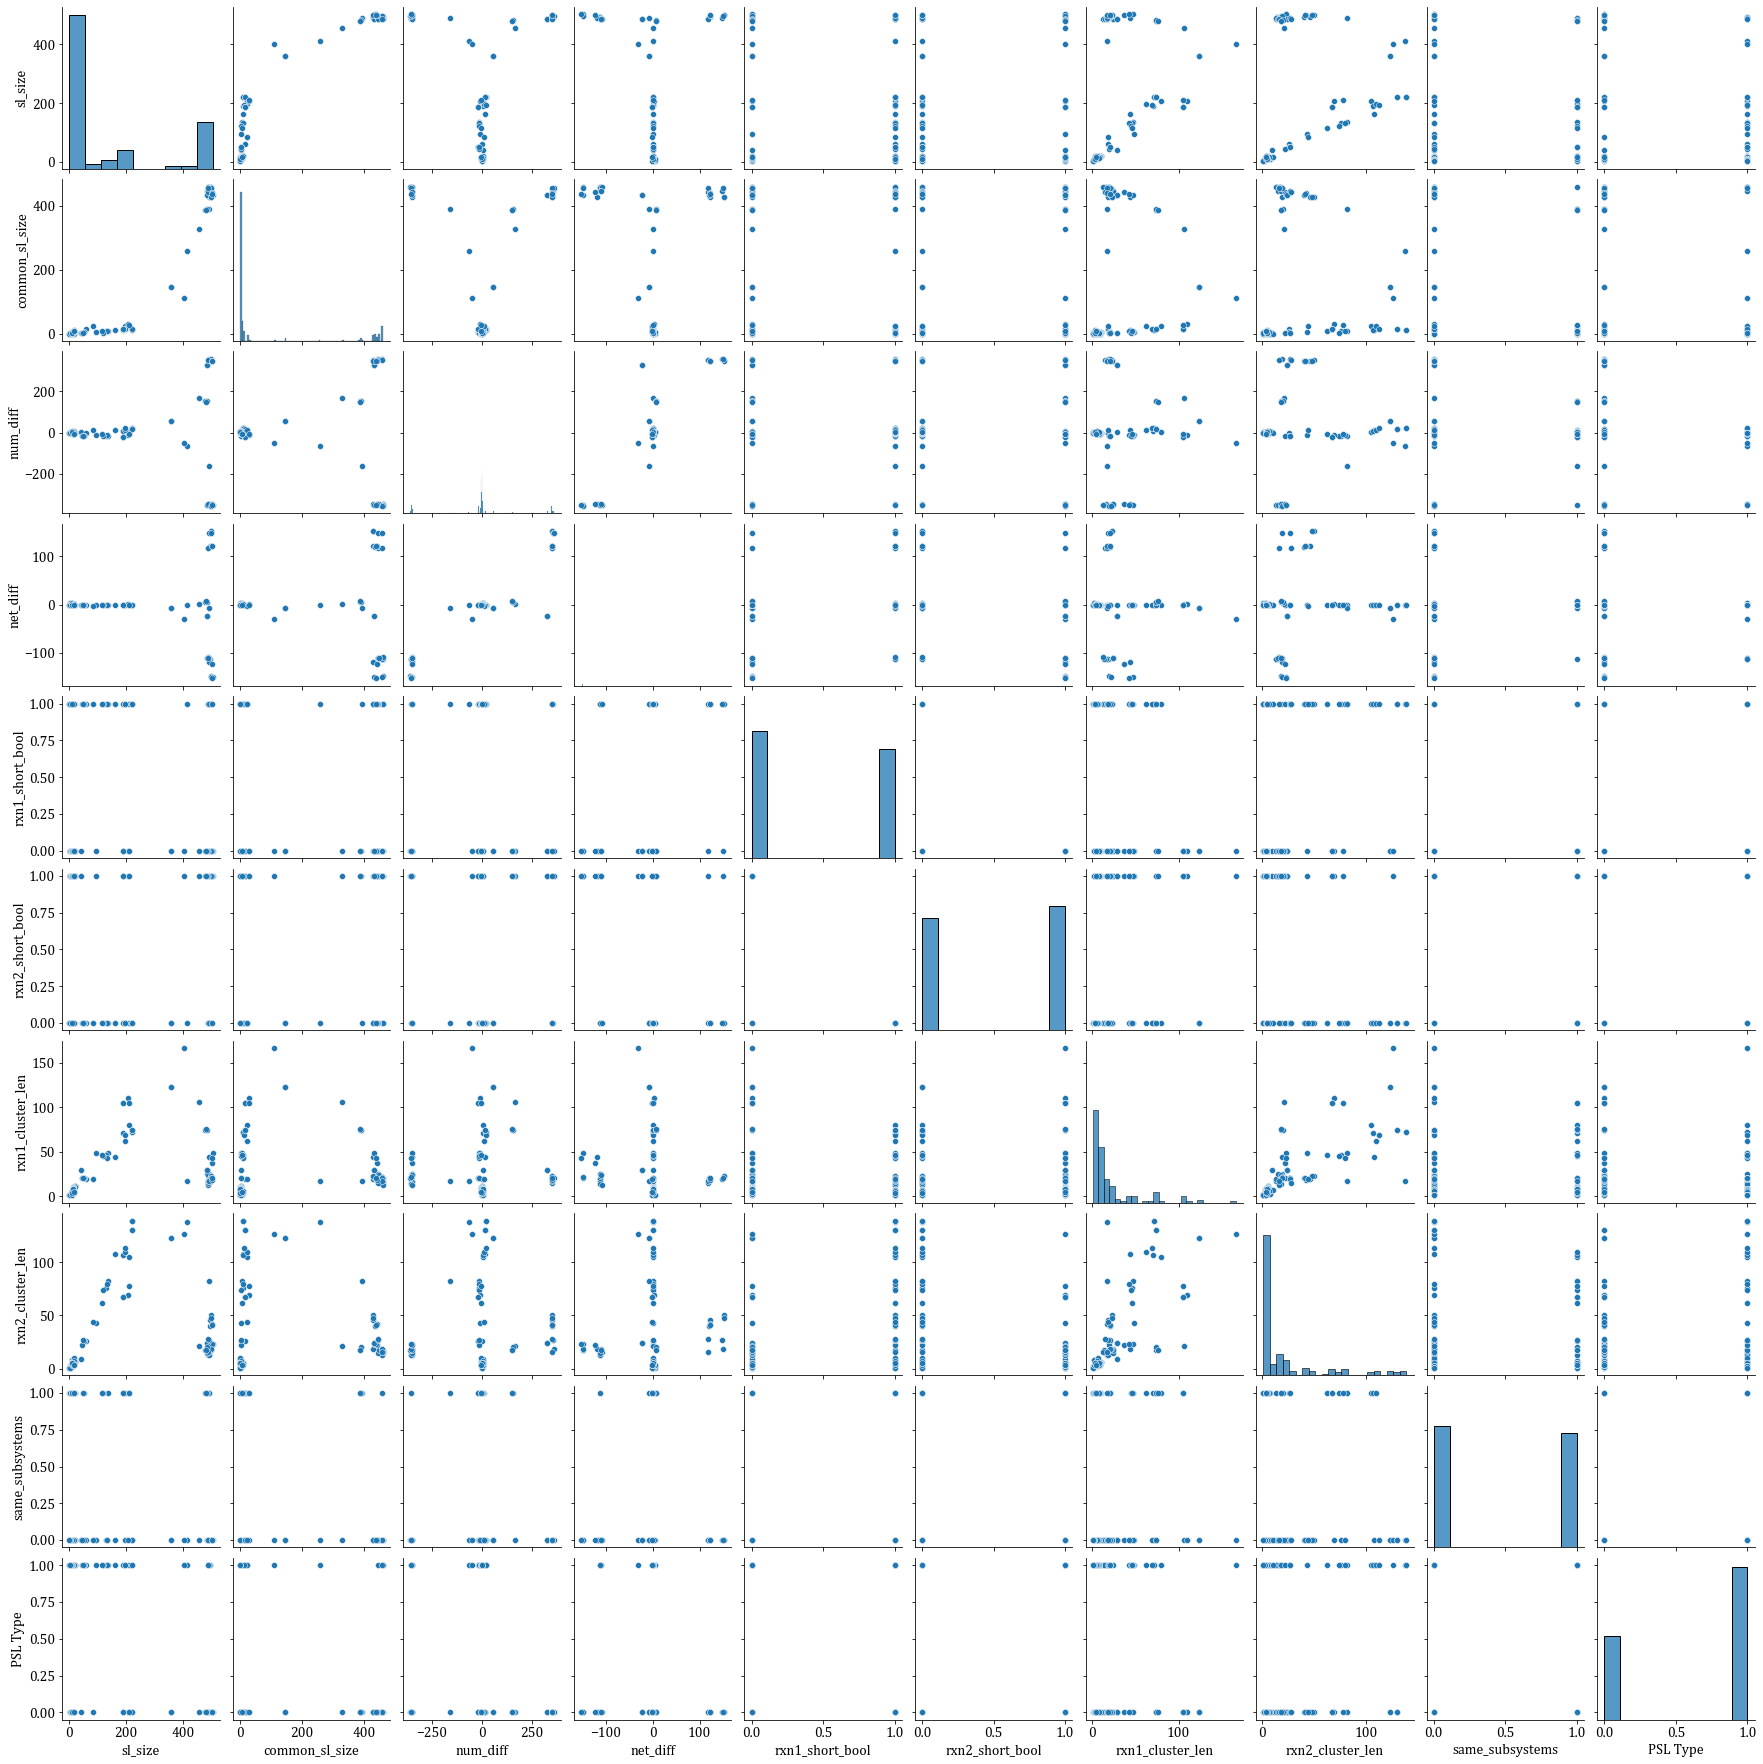

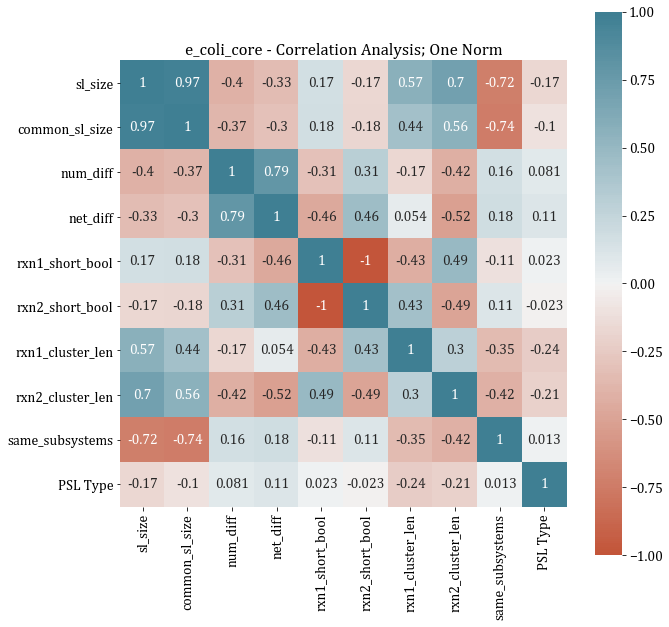

<Figure size 432x288 with 0 Axes>

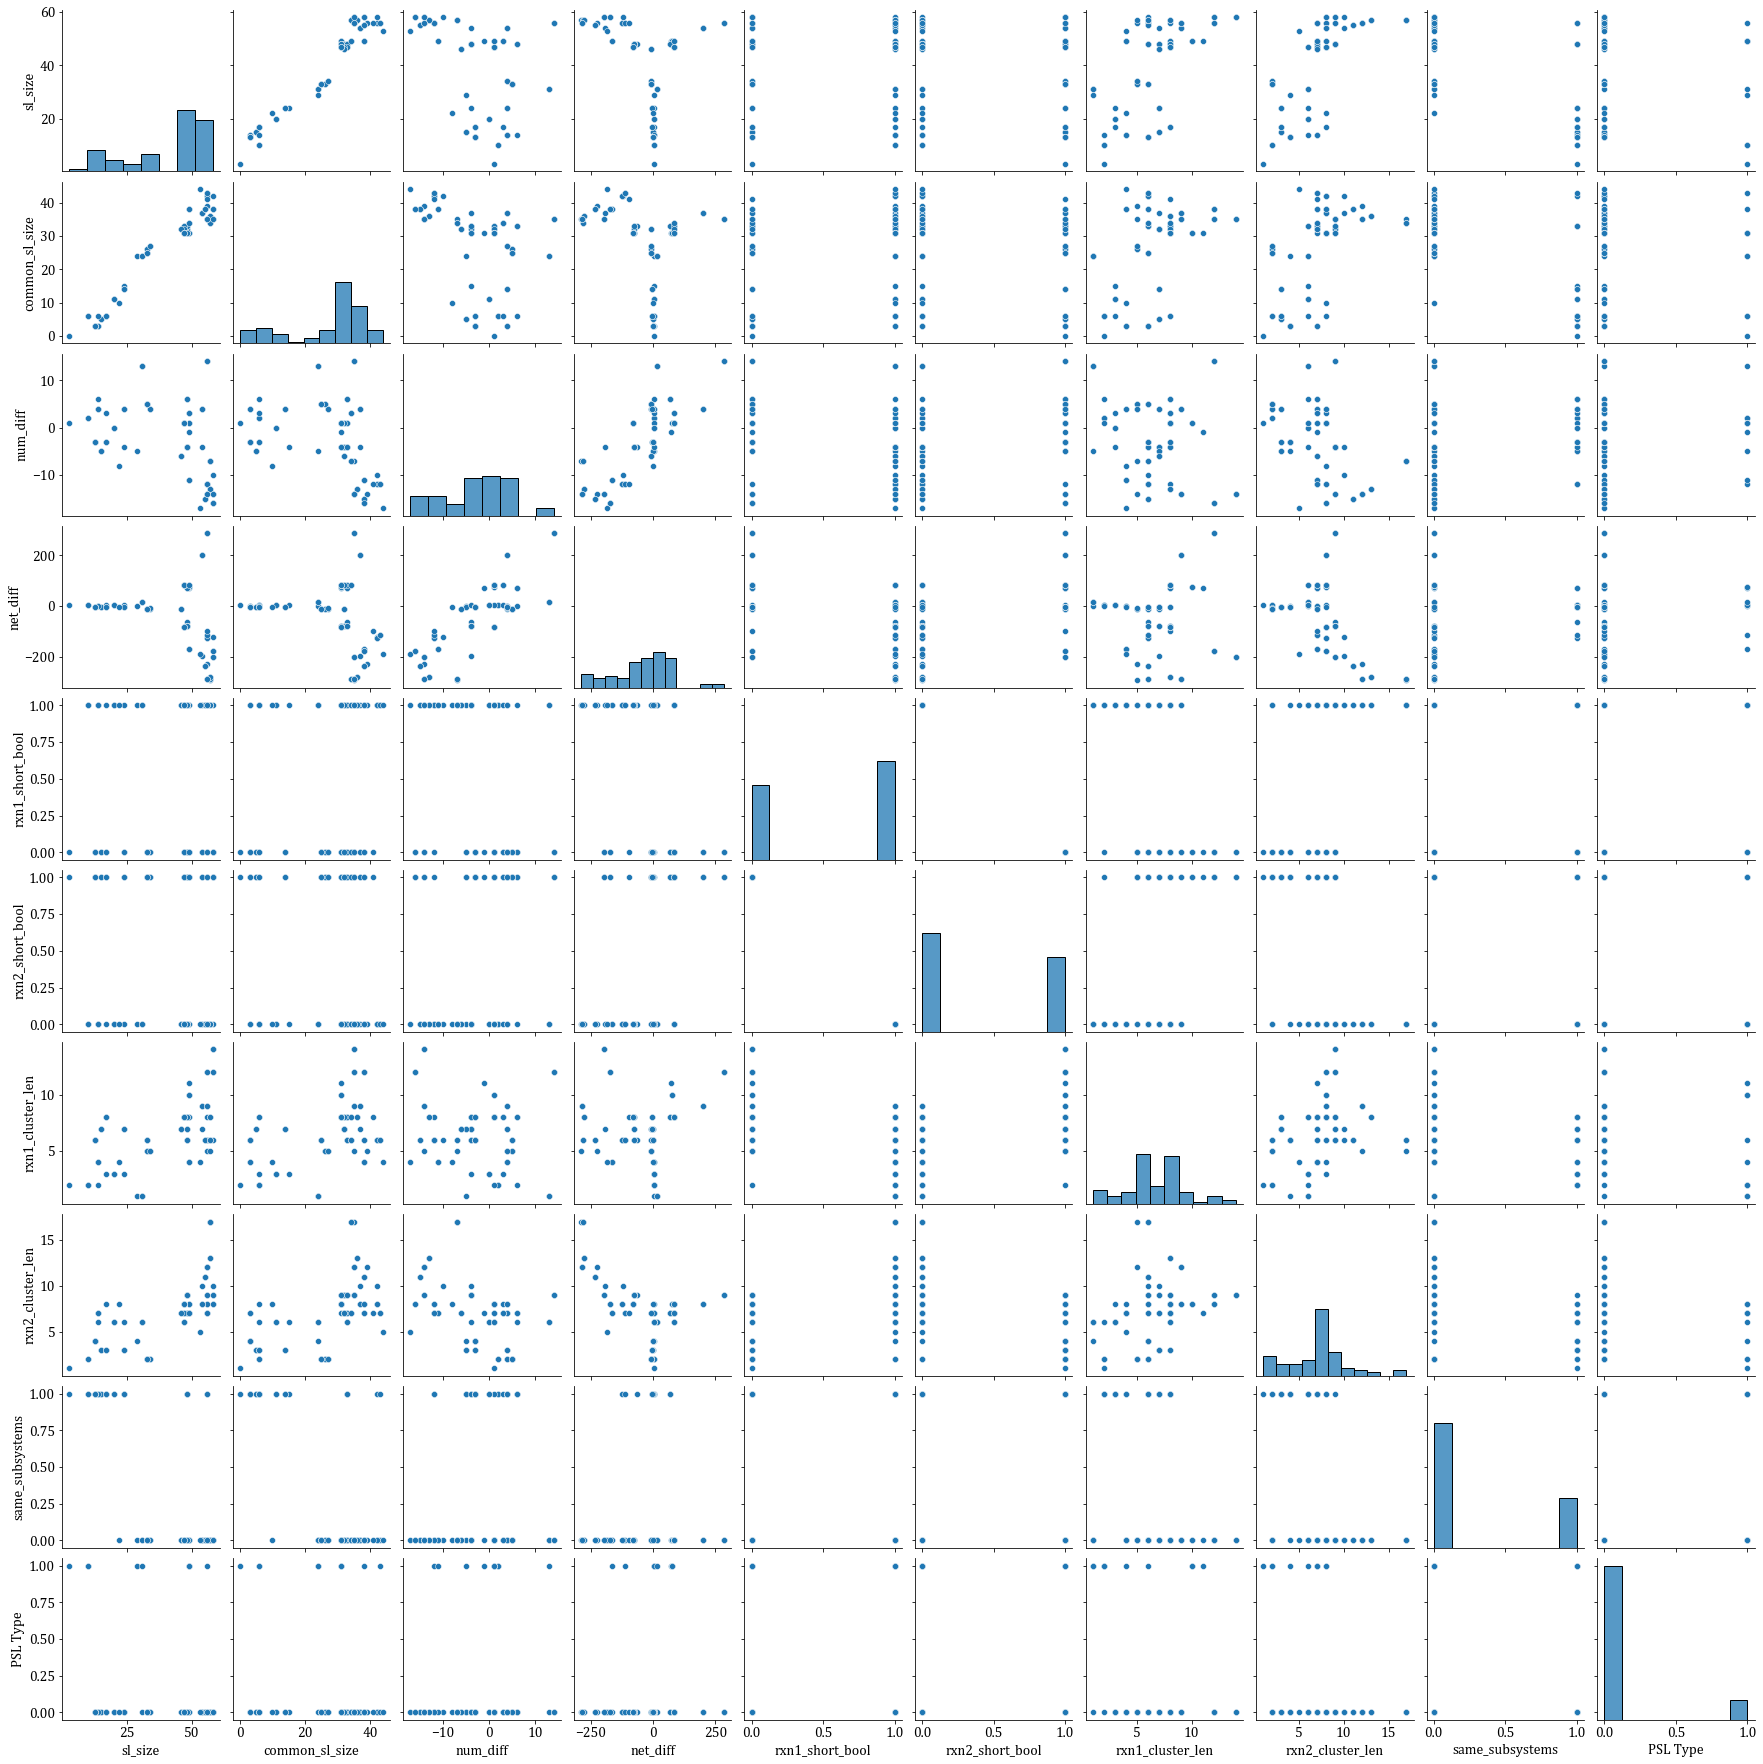

In [2]:
from utils import *

models = ['iIT341', 'iJO1366', 'iML1515', 'iNJ661', 'iPC815', 'iSSON_1240', 'iYL1228', 'STM_v1_0', 'e_coli_core']

for model in models:
    norm = "one"
    mat = loadmat("../results/" + model + "/Castle_" + norm + "_norm.mat")
    
    # Get the minRe data
    data = mat["data"][0][0][-1][0]
    df = preprocess(data)
    df["Organism"] = model

    def find_if_in(cols):
        # print(cols[0], cols[1], cols[0] in cols[1])
        if cols[0] in cols[1]:
            return True
        else:
            return False

    def get_length(cols):
        # cols[0] is the bool array
        #     - True when rxn1 is a part of PathShort
        #     - False when rxn1 is not a part of PathShort
        # cols[1] is PathShort
        # cols[2] is PathLong   
        if cols[0]:
            return len(cols[1])
        else:
            return len(cols[2])

    df["rxn1_short_bool"] = df[["del_rxn1", "PathShort"]].apply(find_if_in, axis=1)
    df["rxn2_short_bool"] = df[["del_rxn2", "PathShort"]].apply(find_if_in, axis=1)

    df["rxn1_cluster_len"] = df[["rxn1_short_bool", "PathShort", "PathLong"]].apply(get_length, axis=1)
    df["rxn2_cluster_len"] = df[["rxn2_short_bool", "PathShort", "PathLong"]].apply(get_length, axis=1)
    
    # Lod the submodule data
    submodule_df = pd.read_csv("../results/" + model + "/" + model +'_submodules.csv', index_col=0)
    df["Subsystem 1"] = submodule_df["Subsystem 1"]
    df["Subsystem 2"] = submodule_df["Subsystem 2"]
    df["same_subsystems"] = (df["Subsystem 1"] == df["Subsystem 2"])
    
    # Load the PSL, RSL data
    psl_rsl_df = pd.read_csv("../results/" + model + "/" + model + "_PSL_RSL_one_norm_100.csv", index_col=0)
    df["Rxn_1_Type"] = psl_rsl_df["Rxn_1_Type"]
    df["Rxn_2_Type"] = psl_rsl_df["Rxn_2_Type"]
    df["PSL RSL Type"] = psl_rsl_df["Type"]
    
    df["PSL Type"] = (df["PSL RSL Type"] == "PSL")
    
    df.to_csv("../results/" + model + "/" + model + "_correlation_study.csv")
    # display(df)
    
    selected_df = df[['sl_size', 'common_sl_size', 'num_diff', 'net_diff', \
                  'rxn1_short_bool', 'rxn2_short_bool', 'rxn1_cluster_len', \
                  'rxn2_cluster_len', 'Subsystem 1', 'Subsystem 2', \
                  'same_subsystems', 'PSL Type']]
    
    plt.figure(figsize=(10,10))
    sns.heatmap(selected_df.corr(), vmin=-1, vmax=1, center=0, \
                cmap=sns.diverging_palette(20, 220, n=200), square=True, \
                annot=True)
    plt.title(model + " - Correlation Analysis; One Norm")
    plt.savefig("../results/one_norm" + model + "_correlation_heatmap.png")
    plt.show()
    
    plt.figure()
    sns.pairplot(selected_df)
    plt.show()

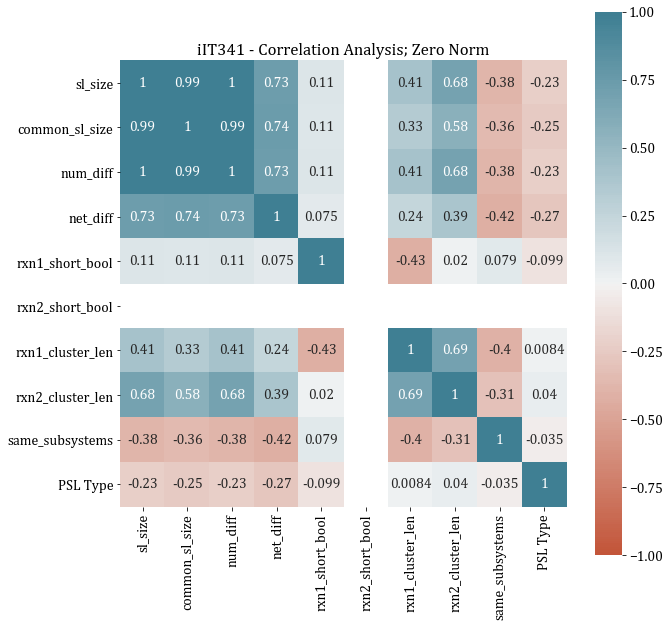

<Figure size 432x288 with 0 Axes>

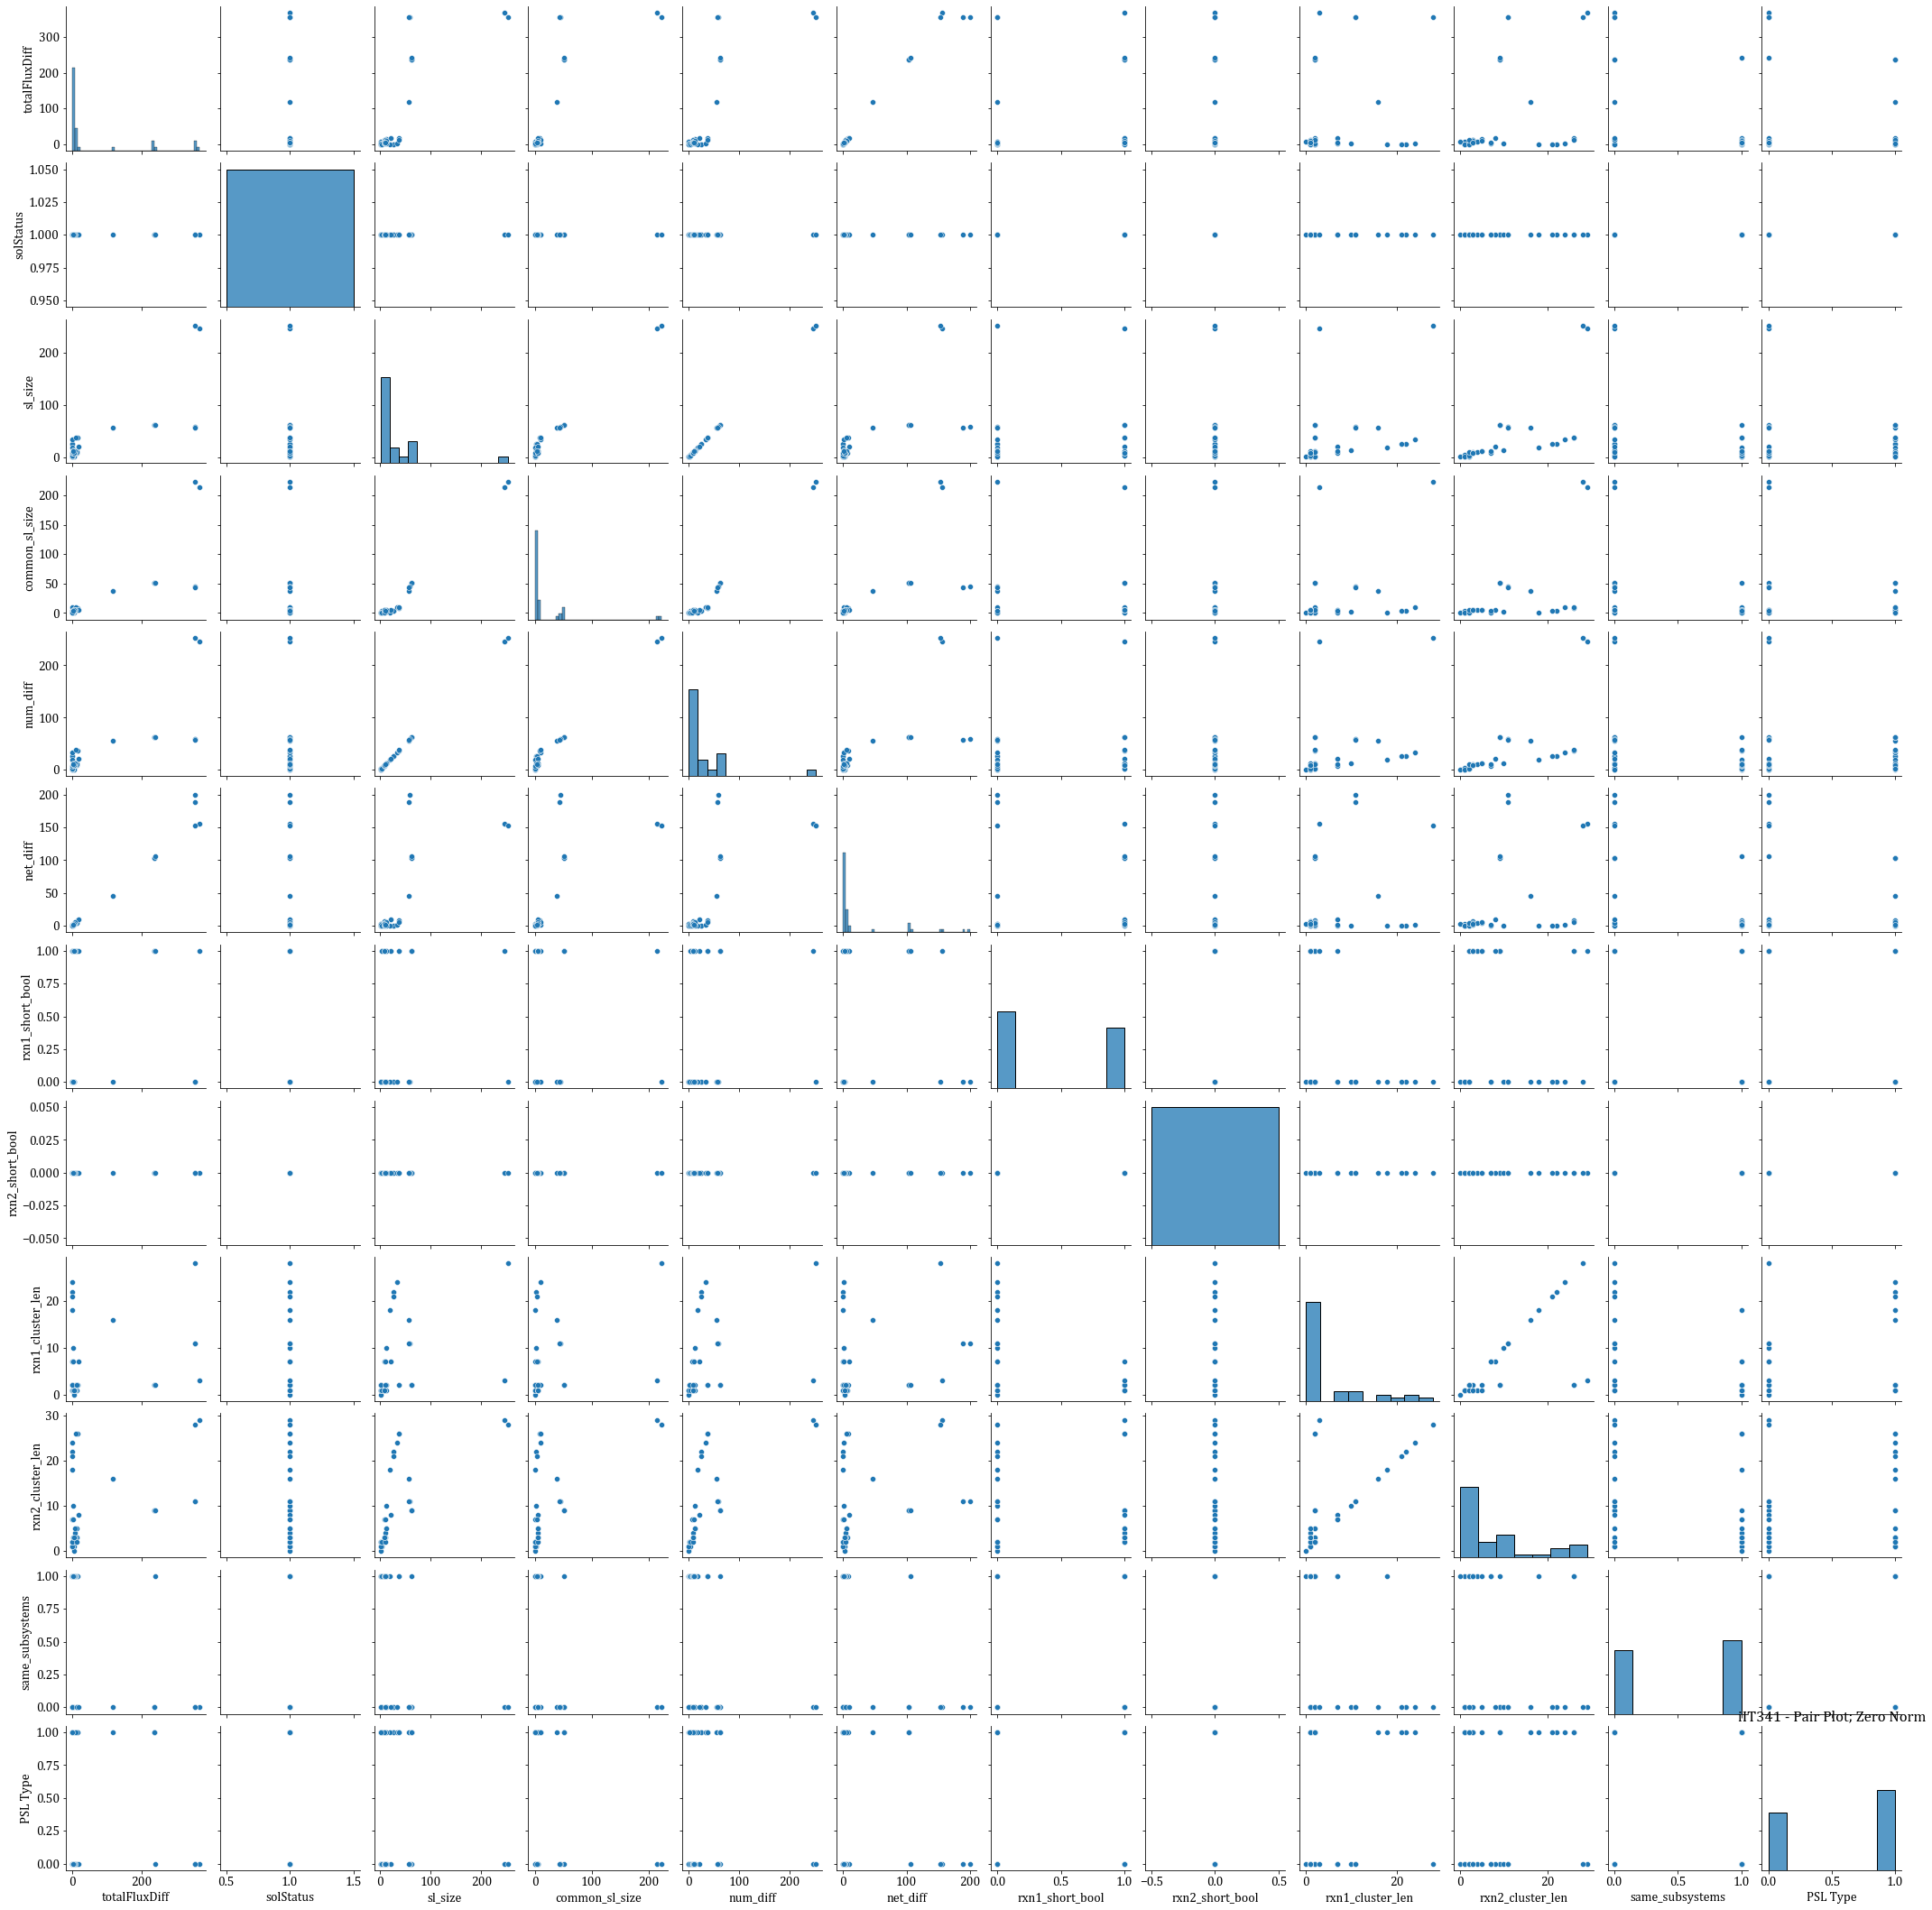

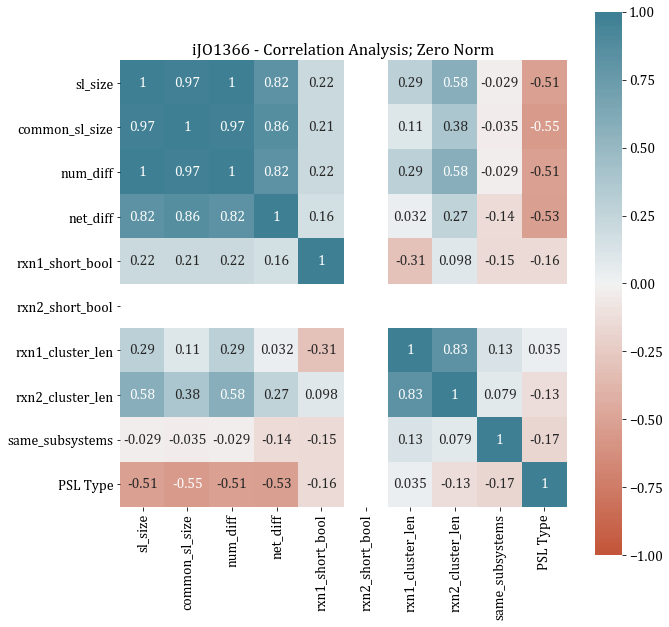

<Figure size 432x288 with 0 Axes>

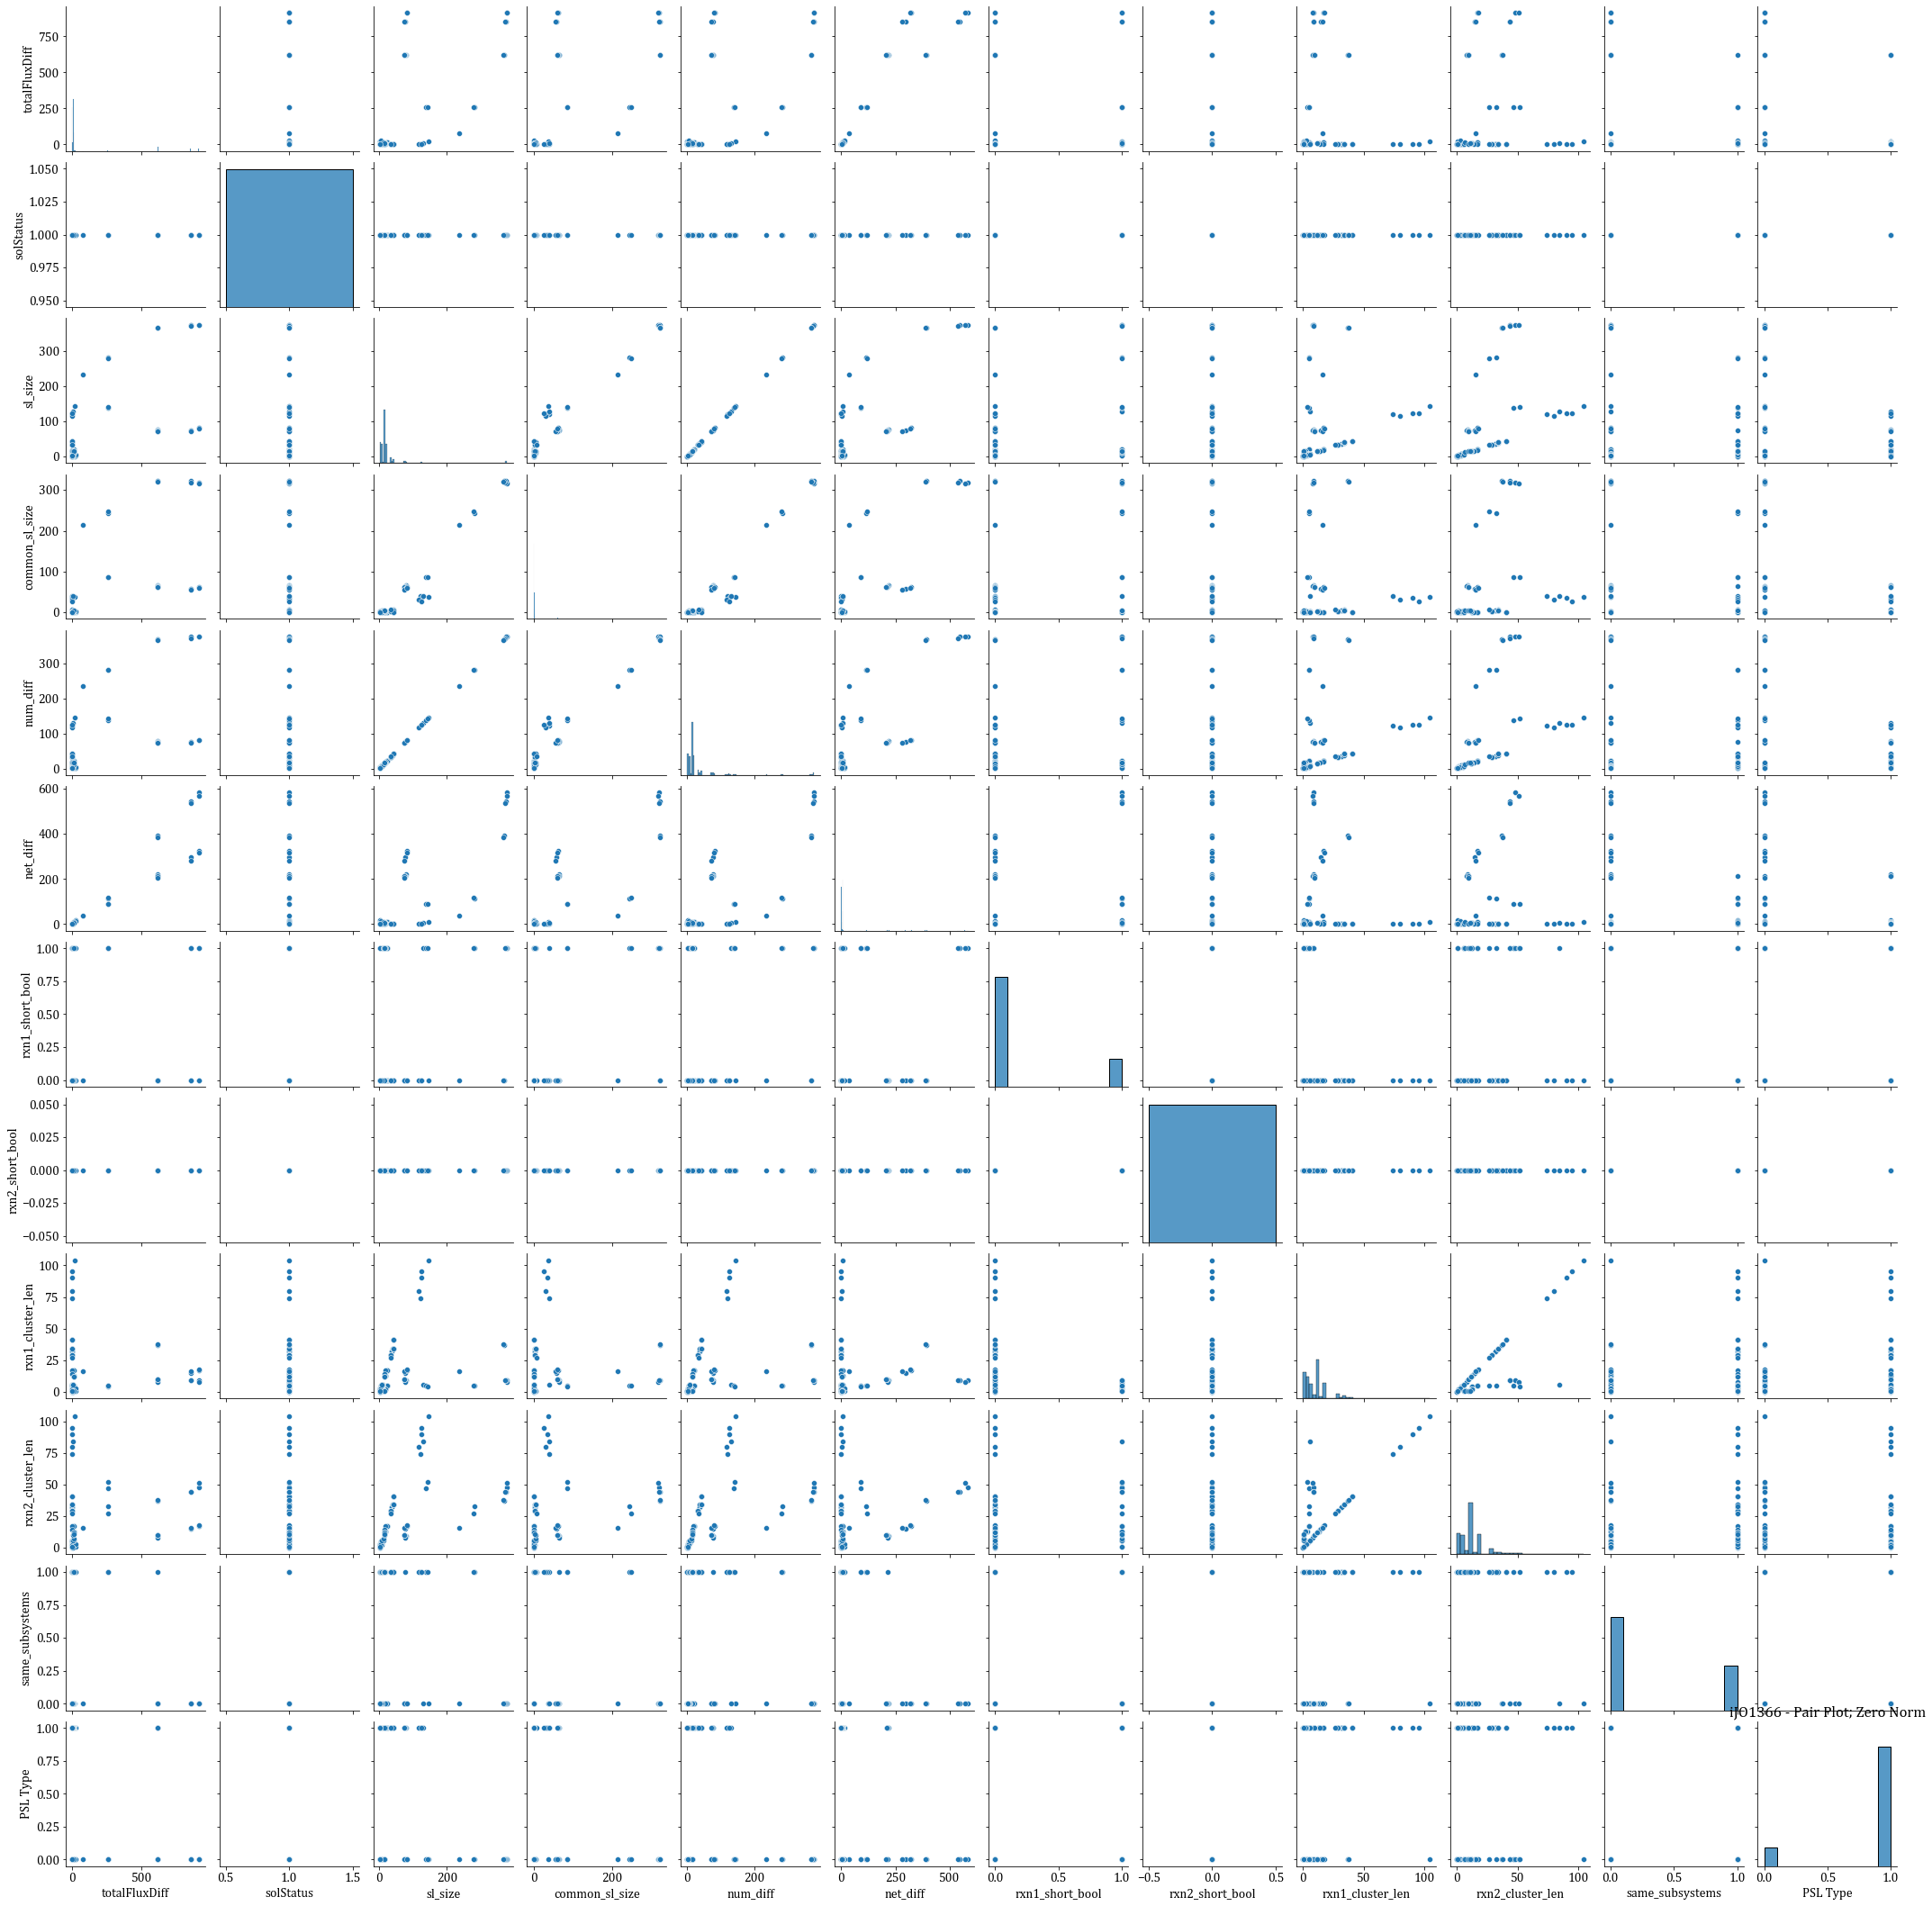

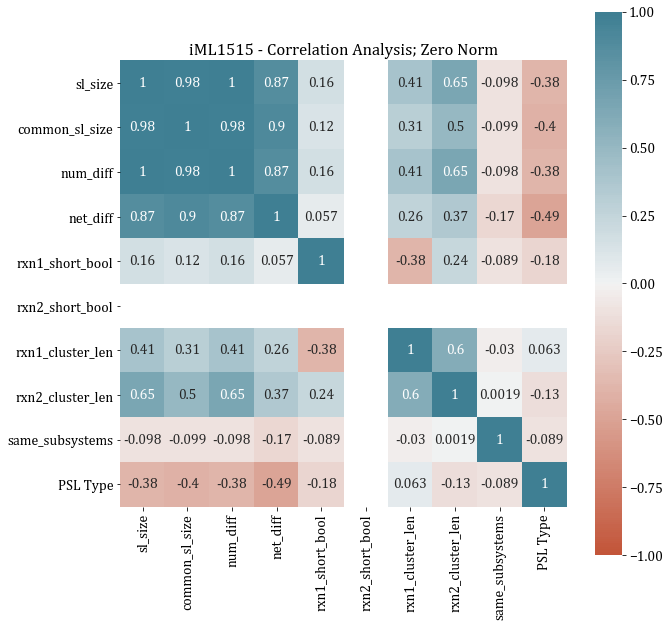

<Figure size 432x288 with 0 Axes>

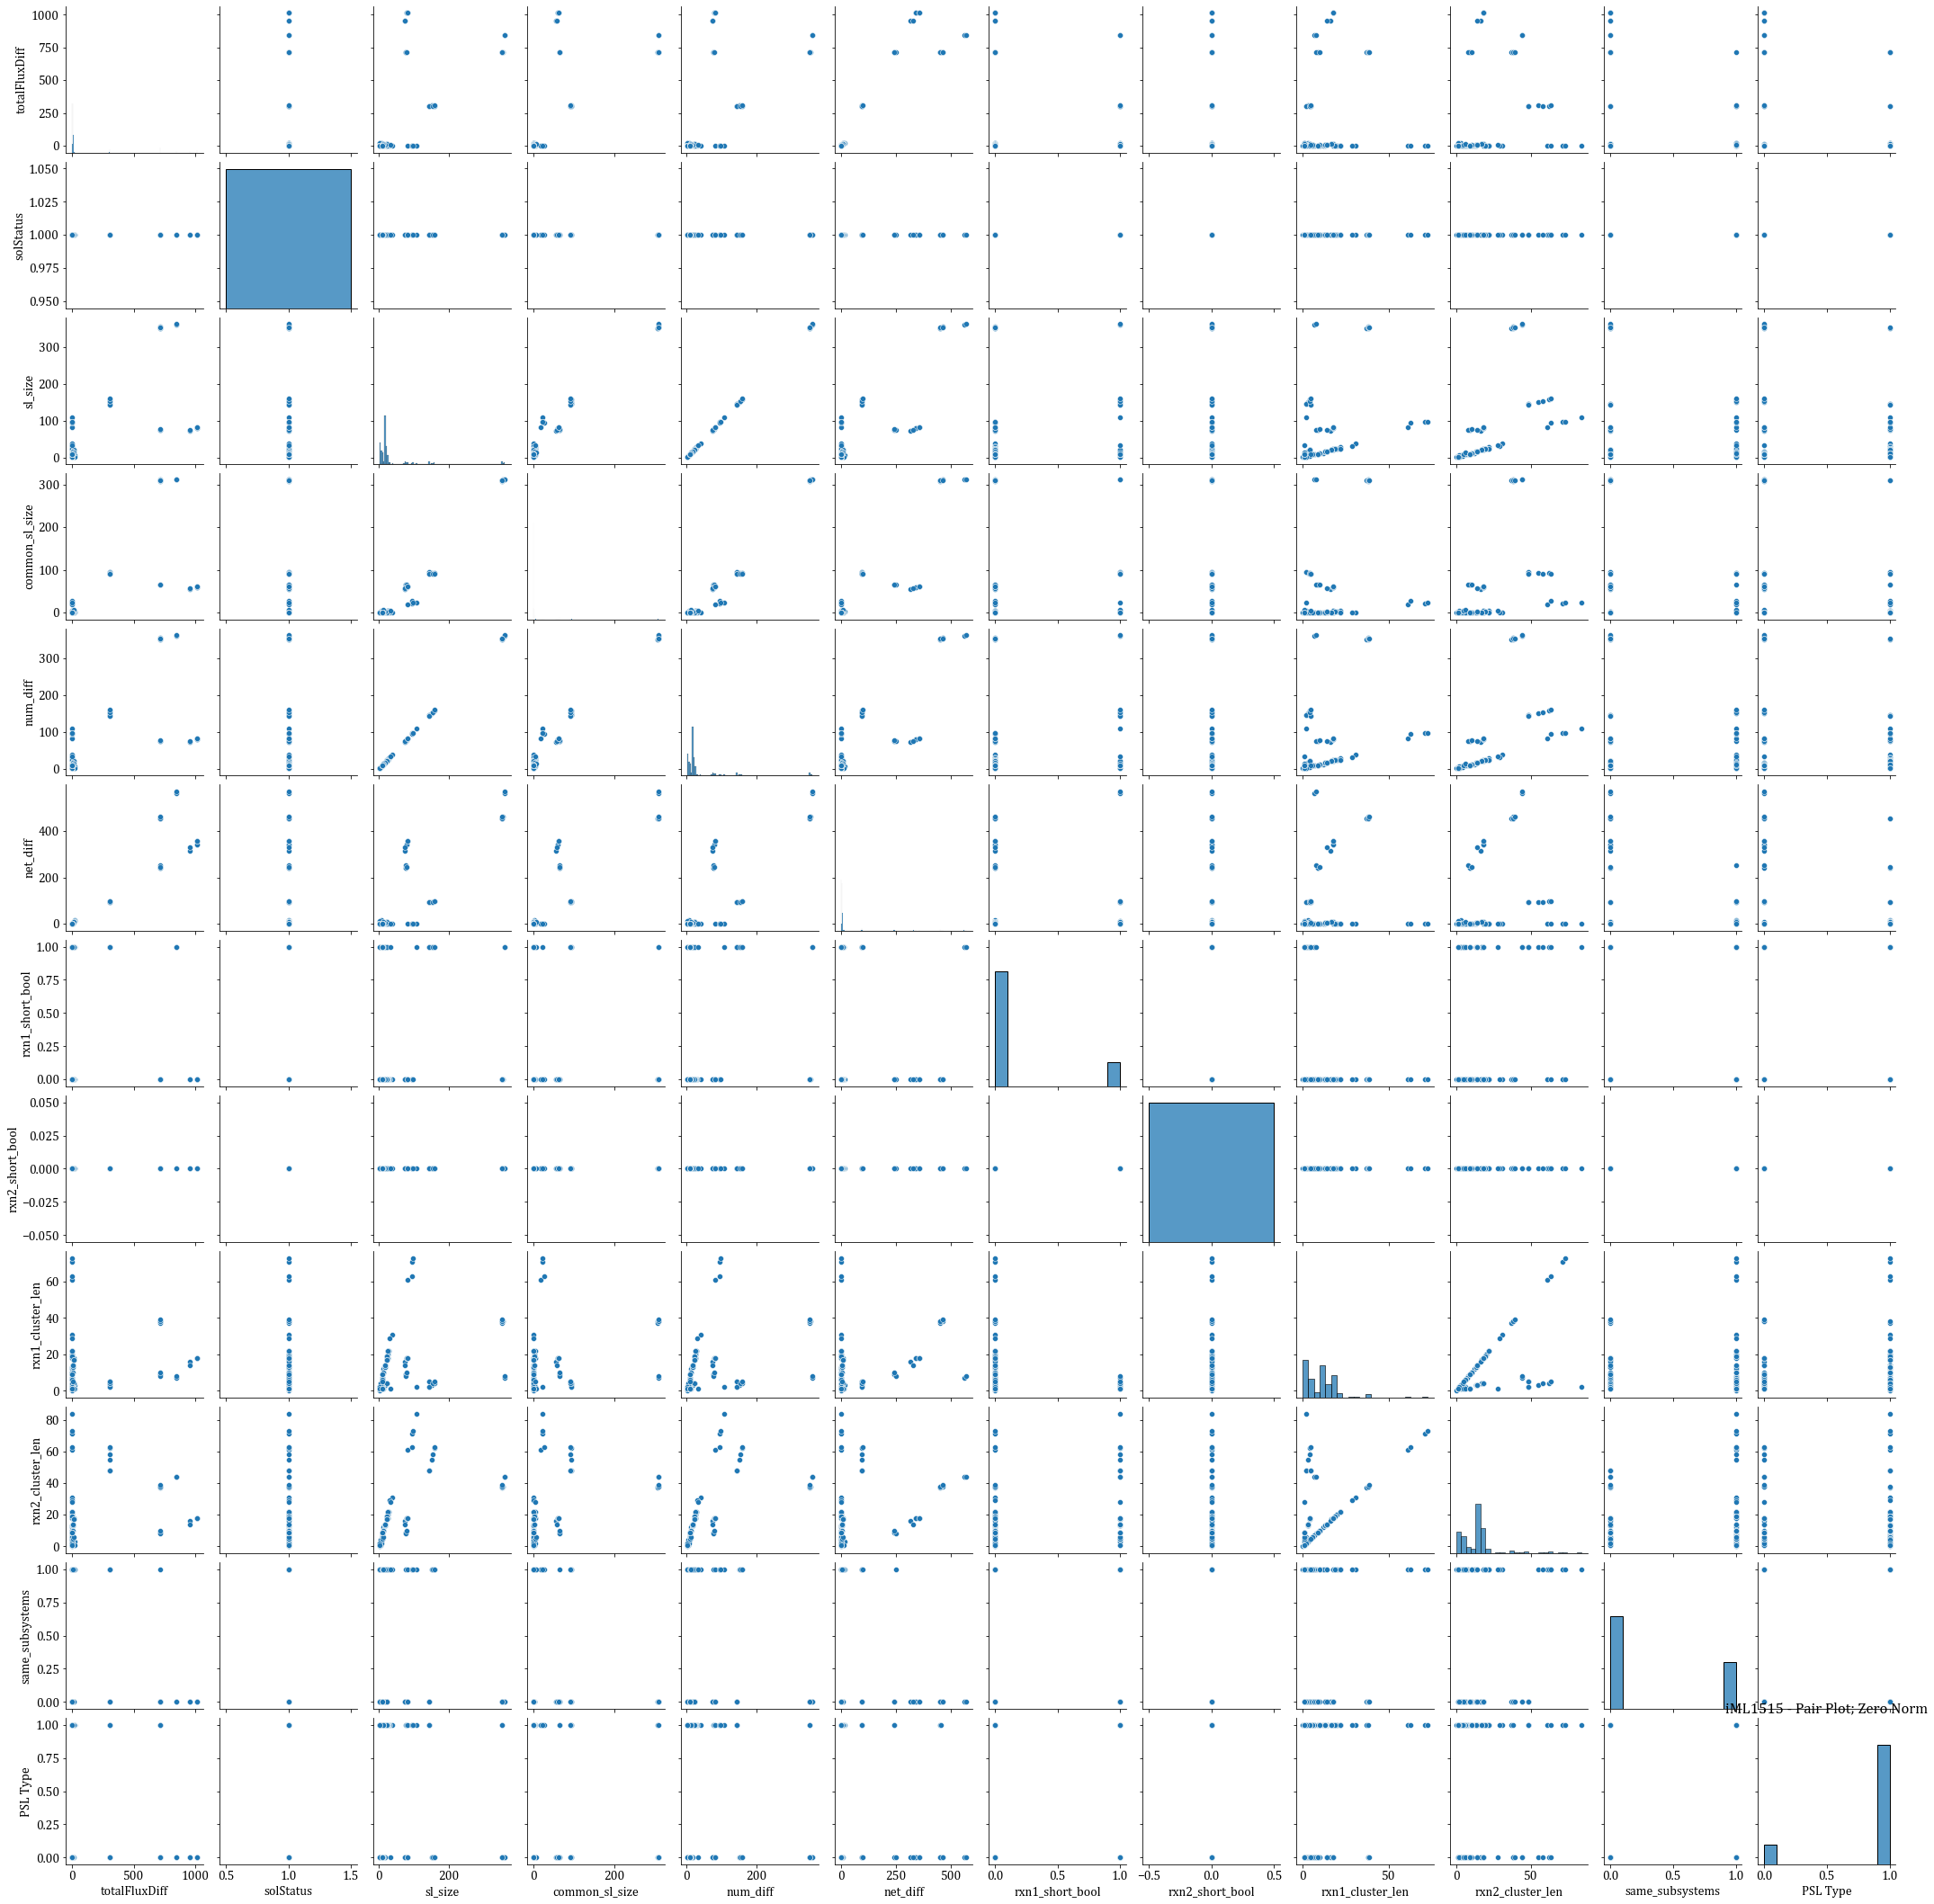

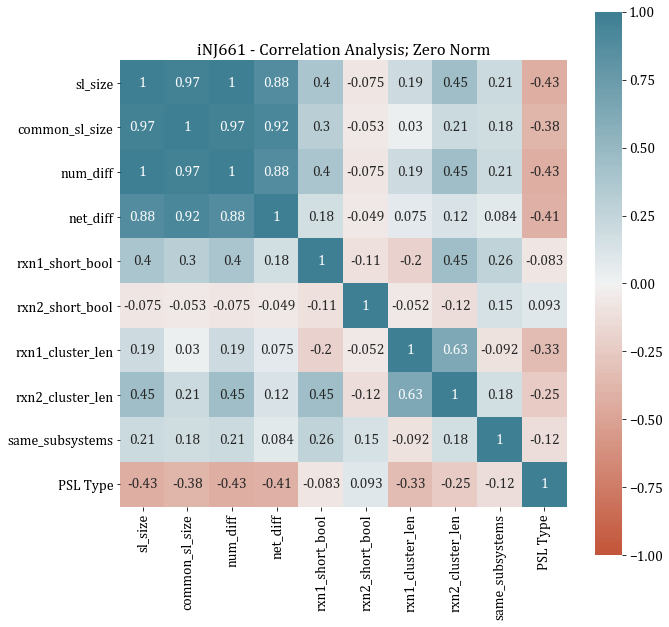

<Figure size 432x288 with 0 Axes>

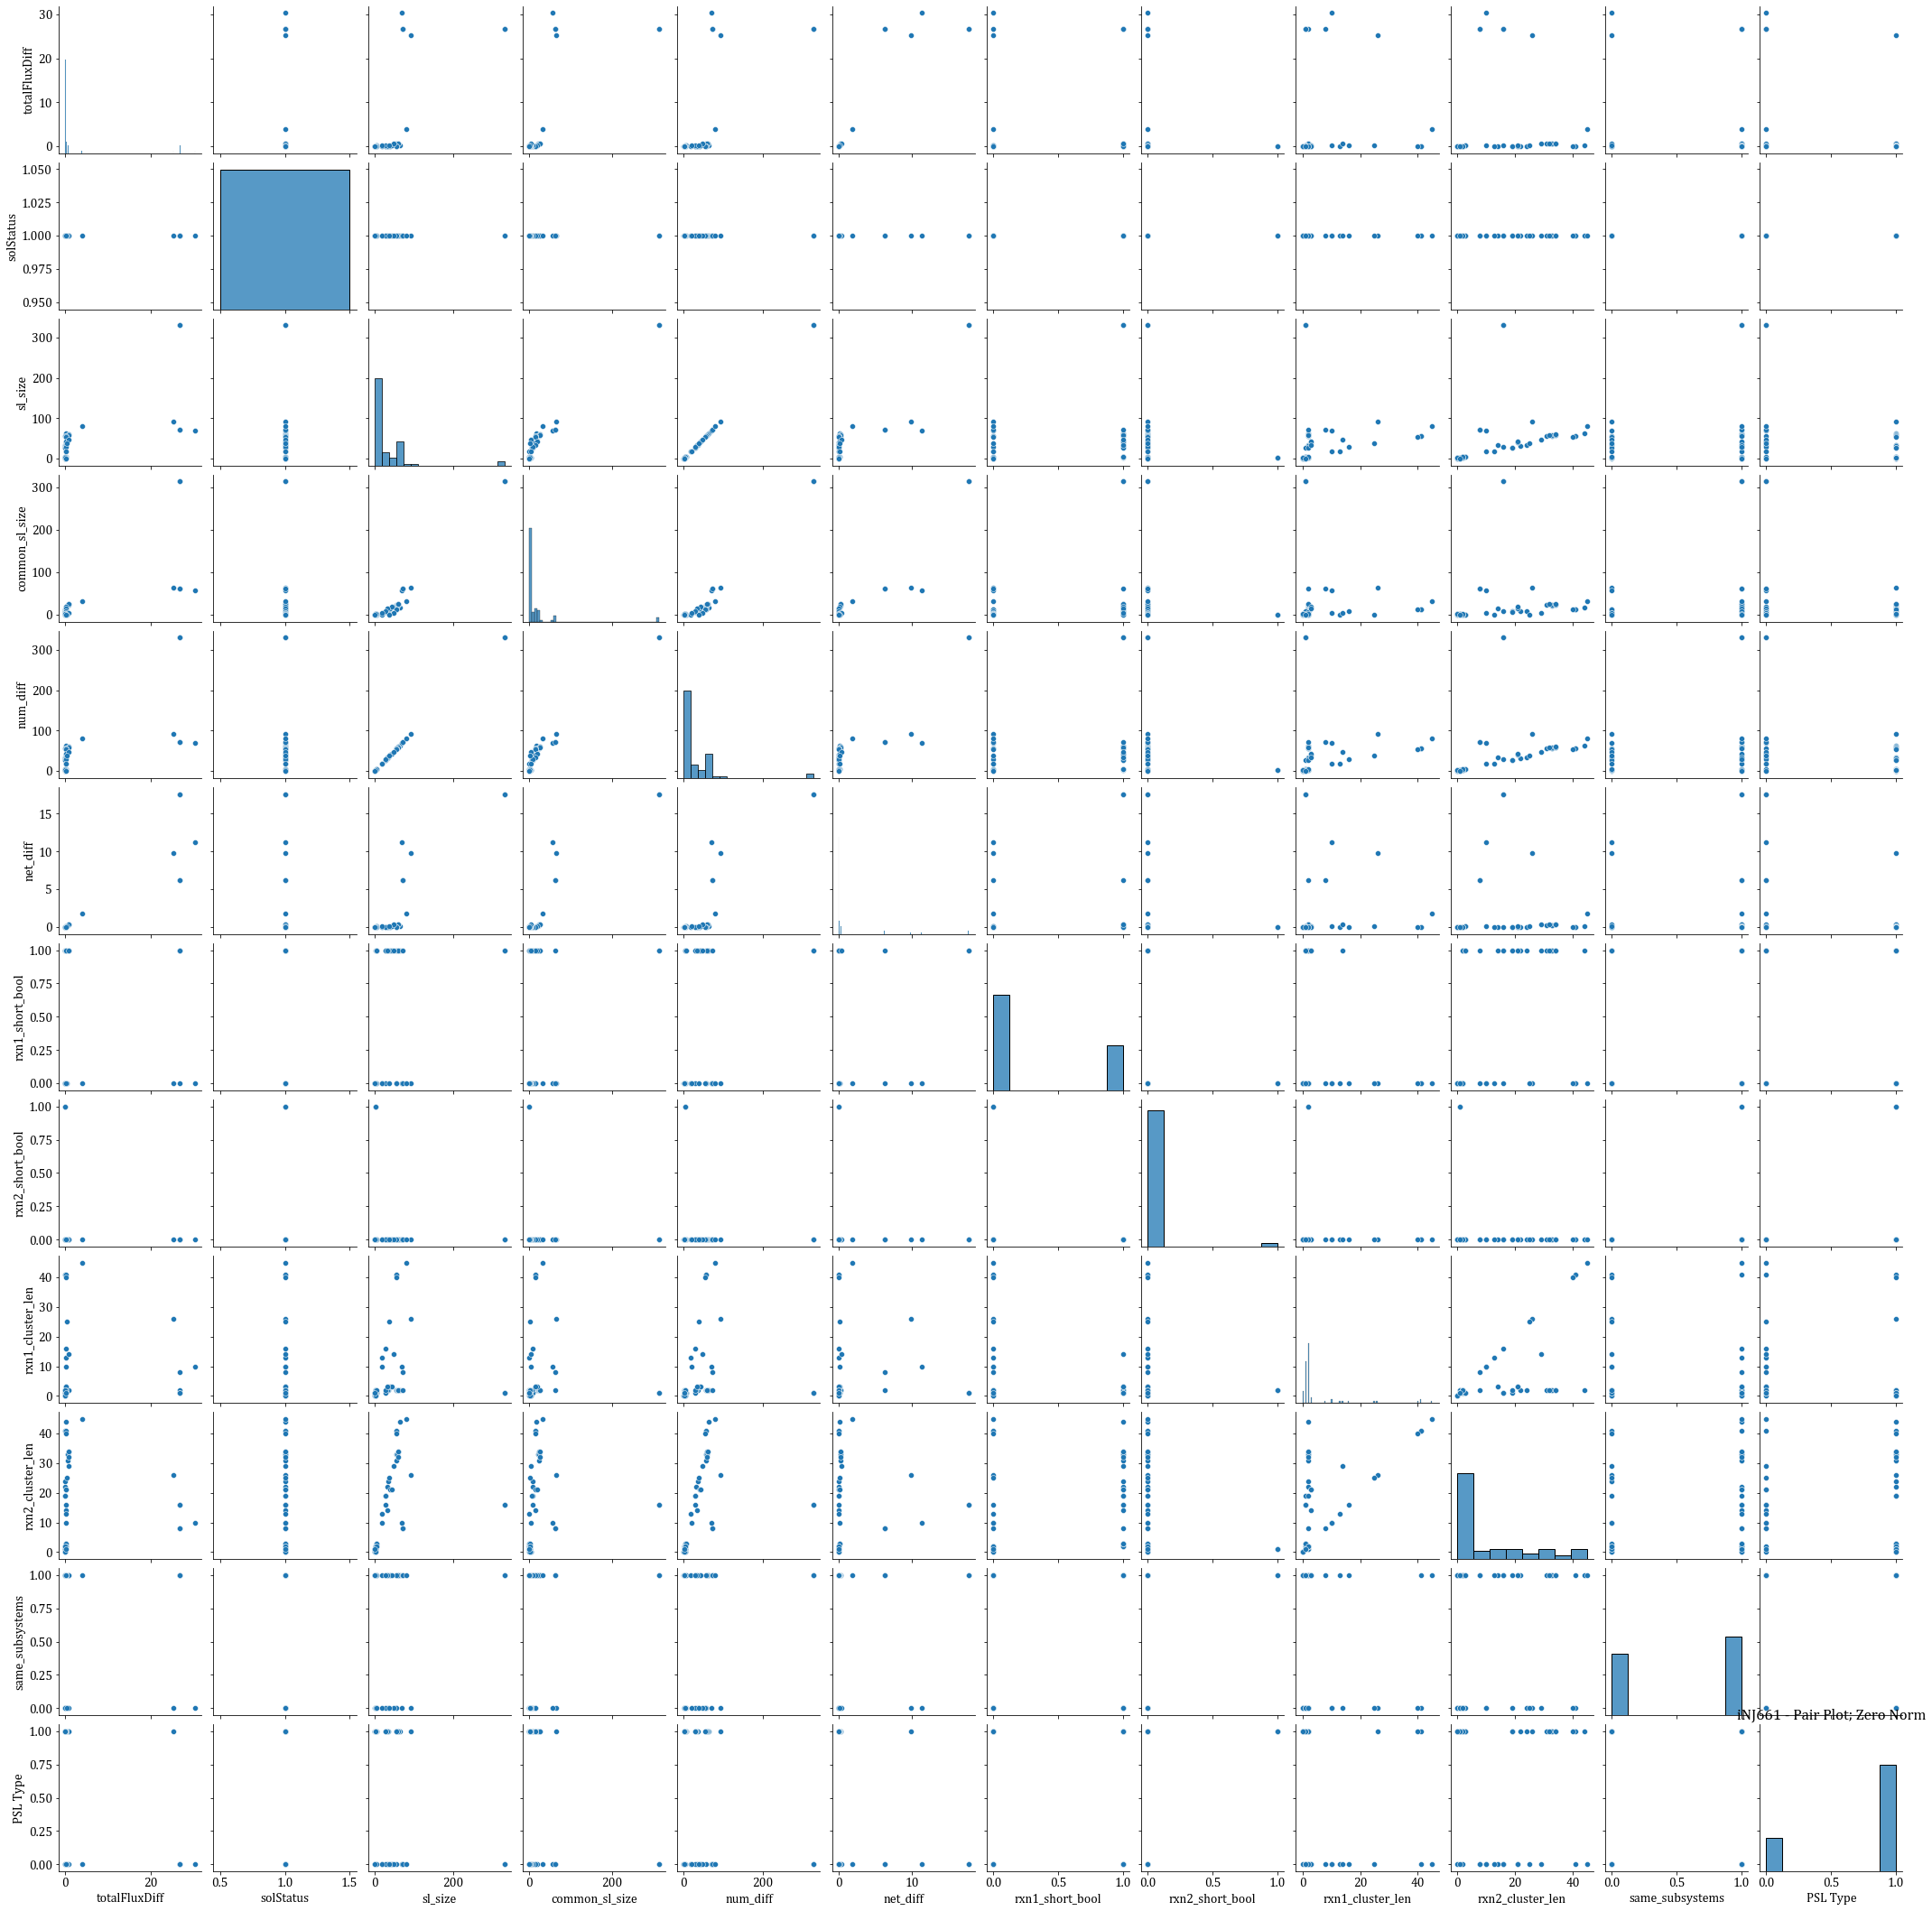

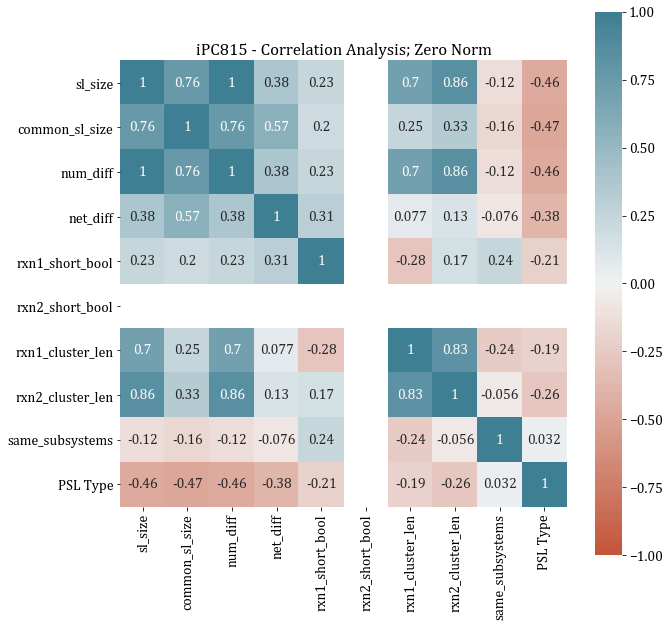

<Figure size 432x288 with 0 Axes>

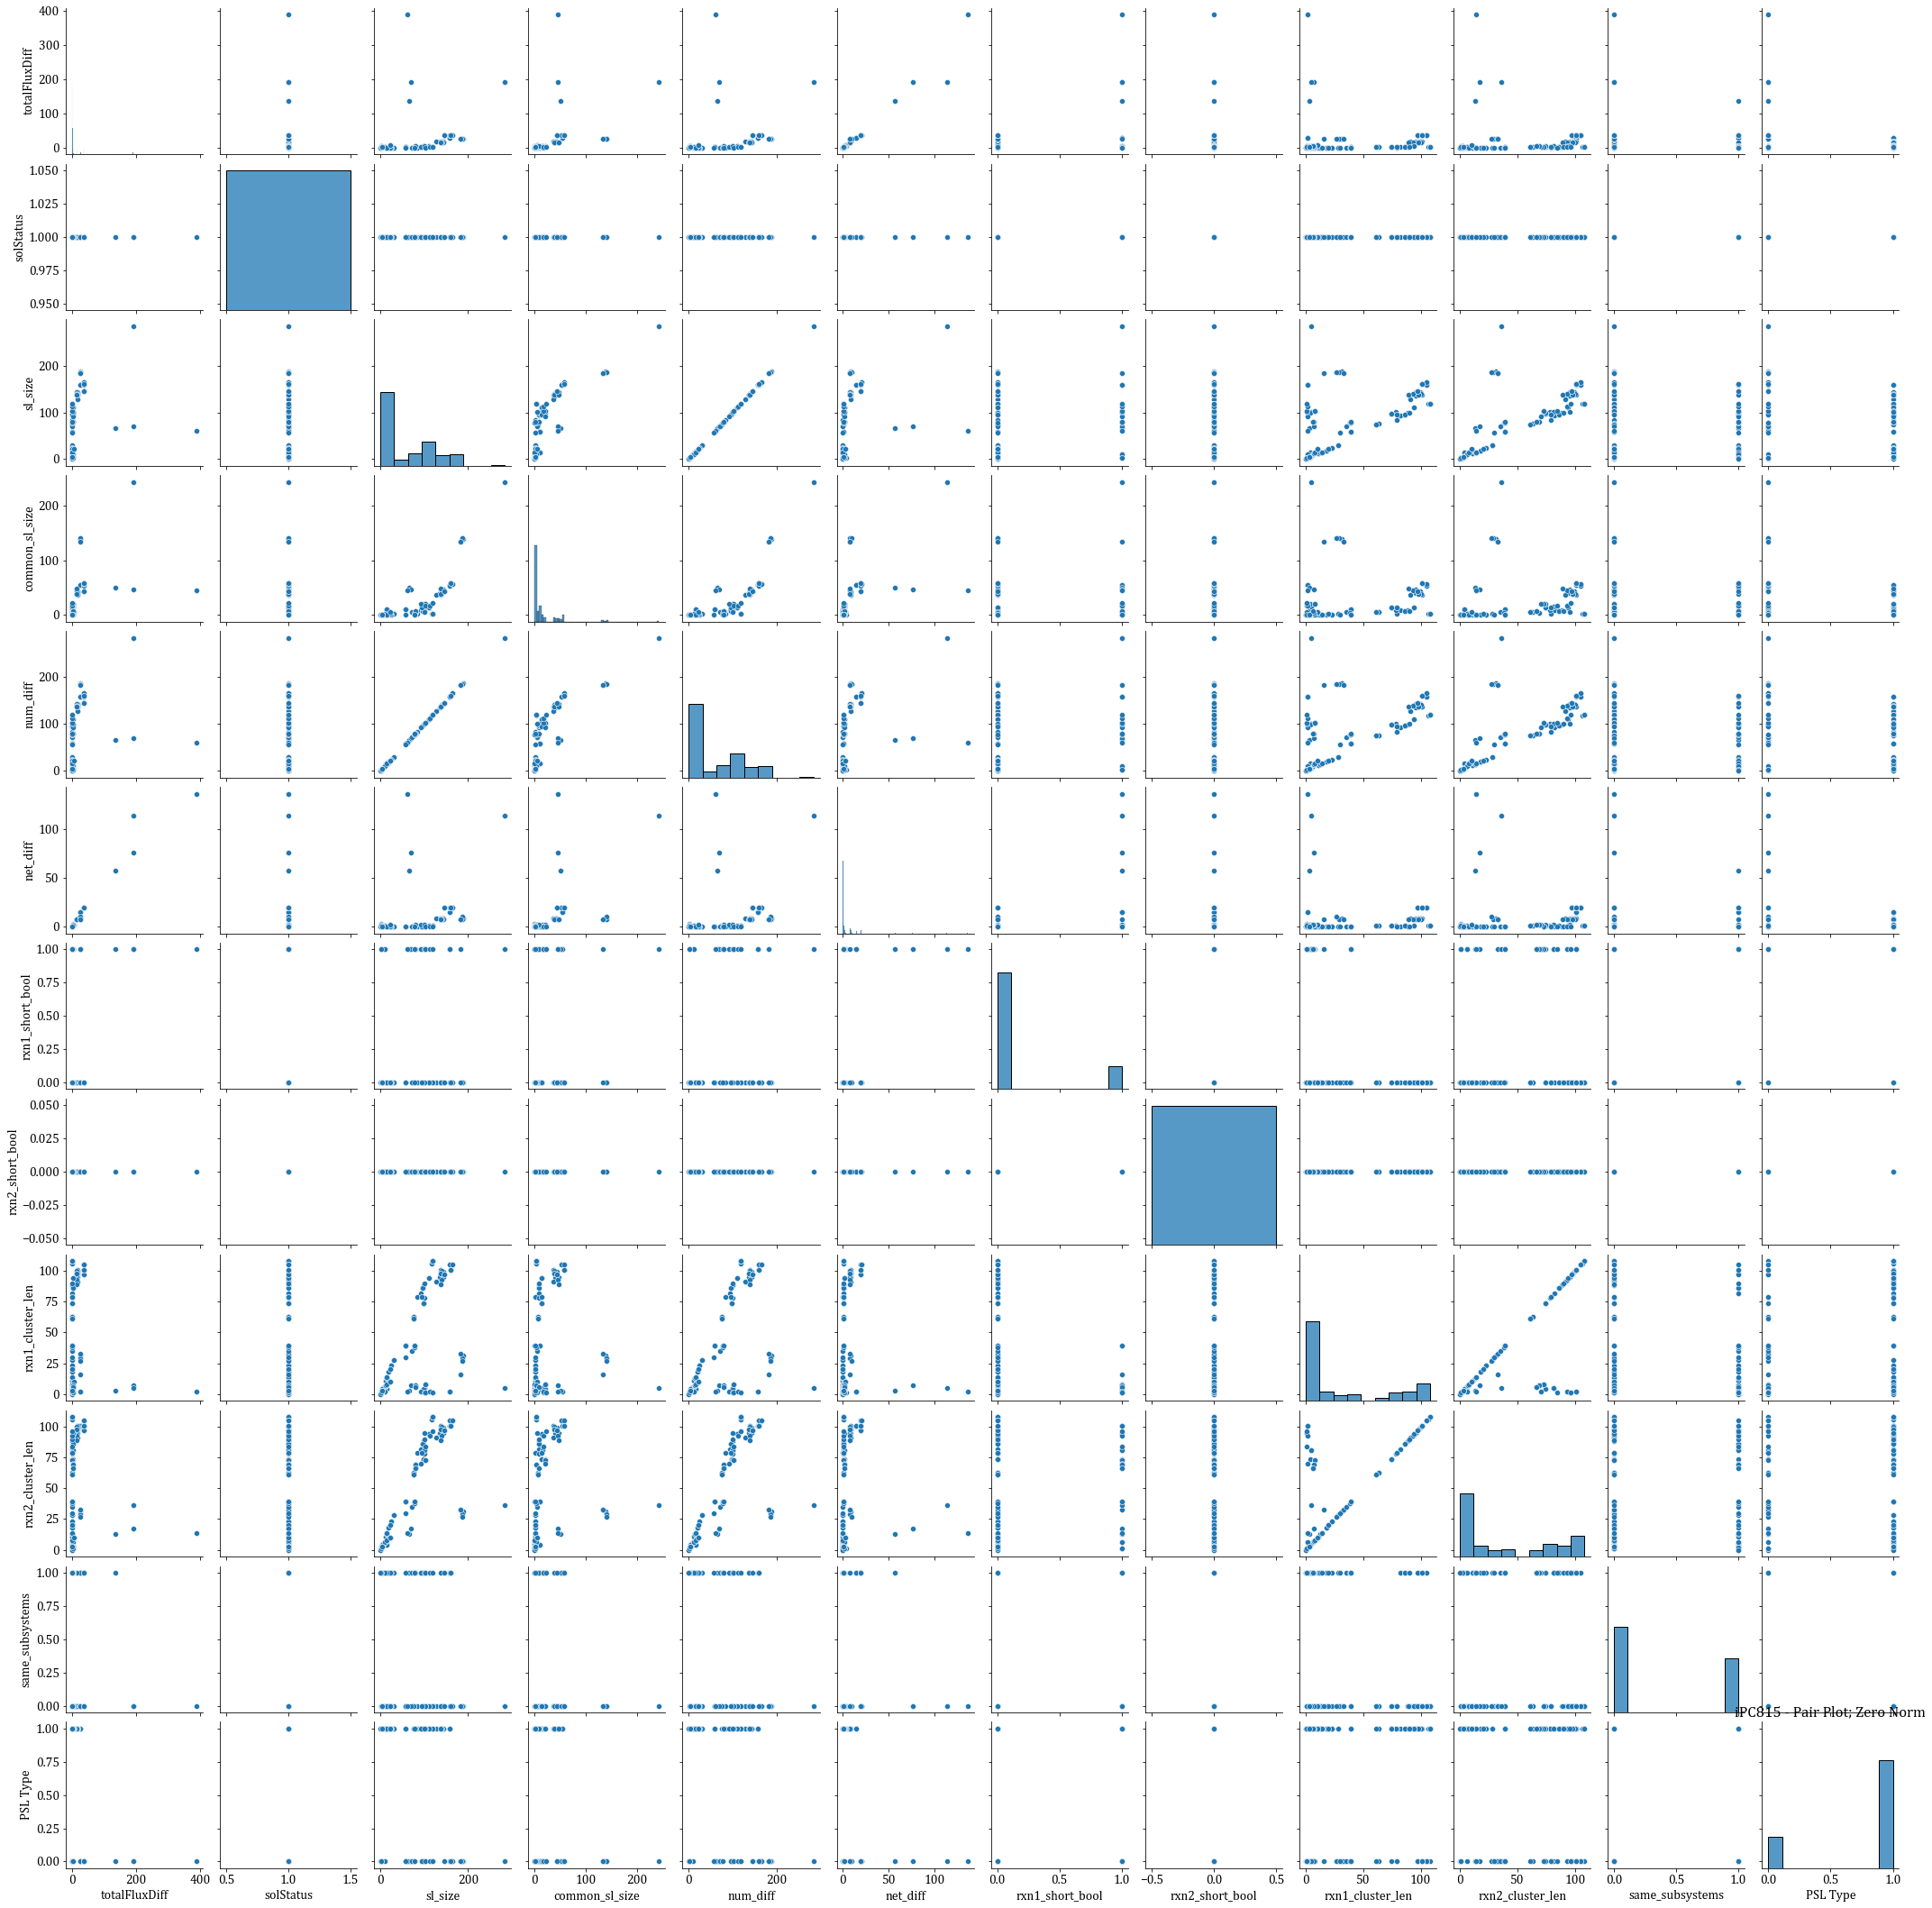

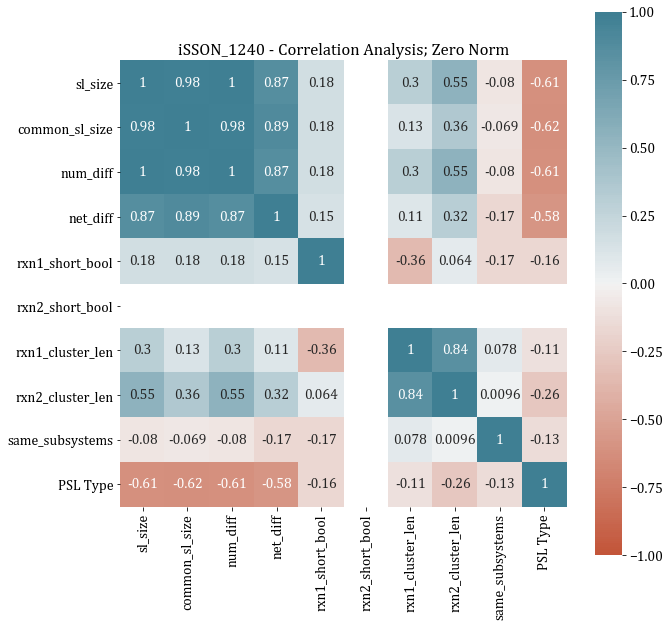

<Figure size 432x288 with 0 Axes>

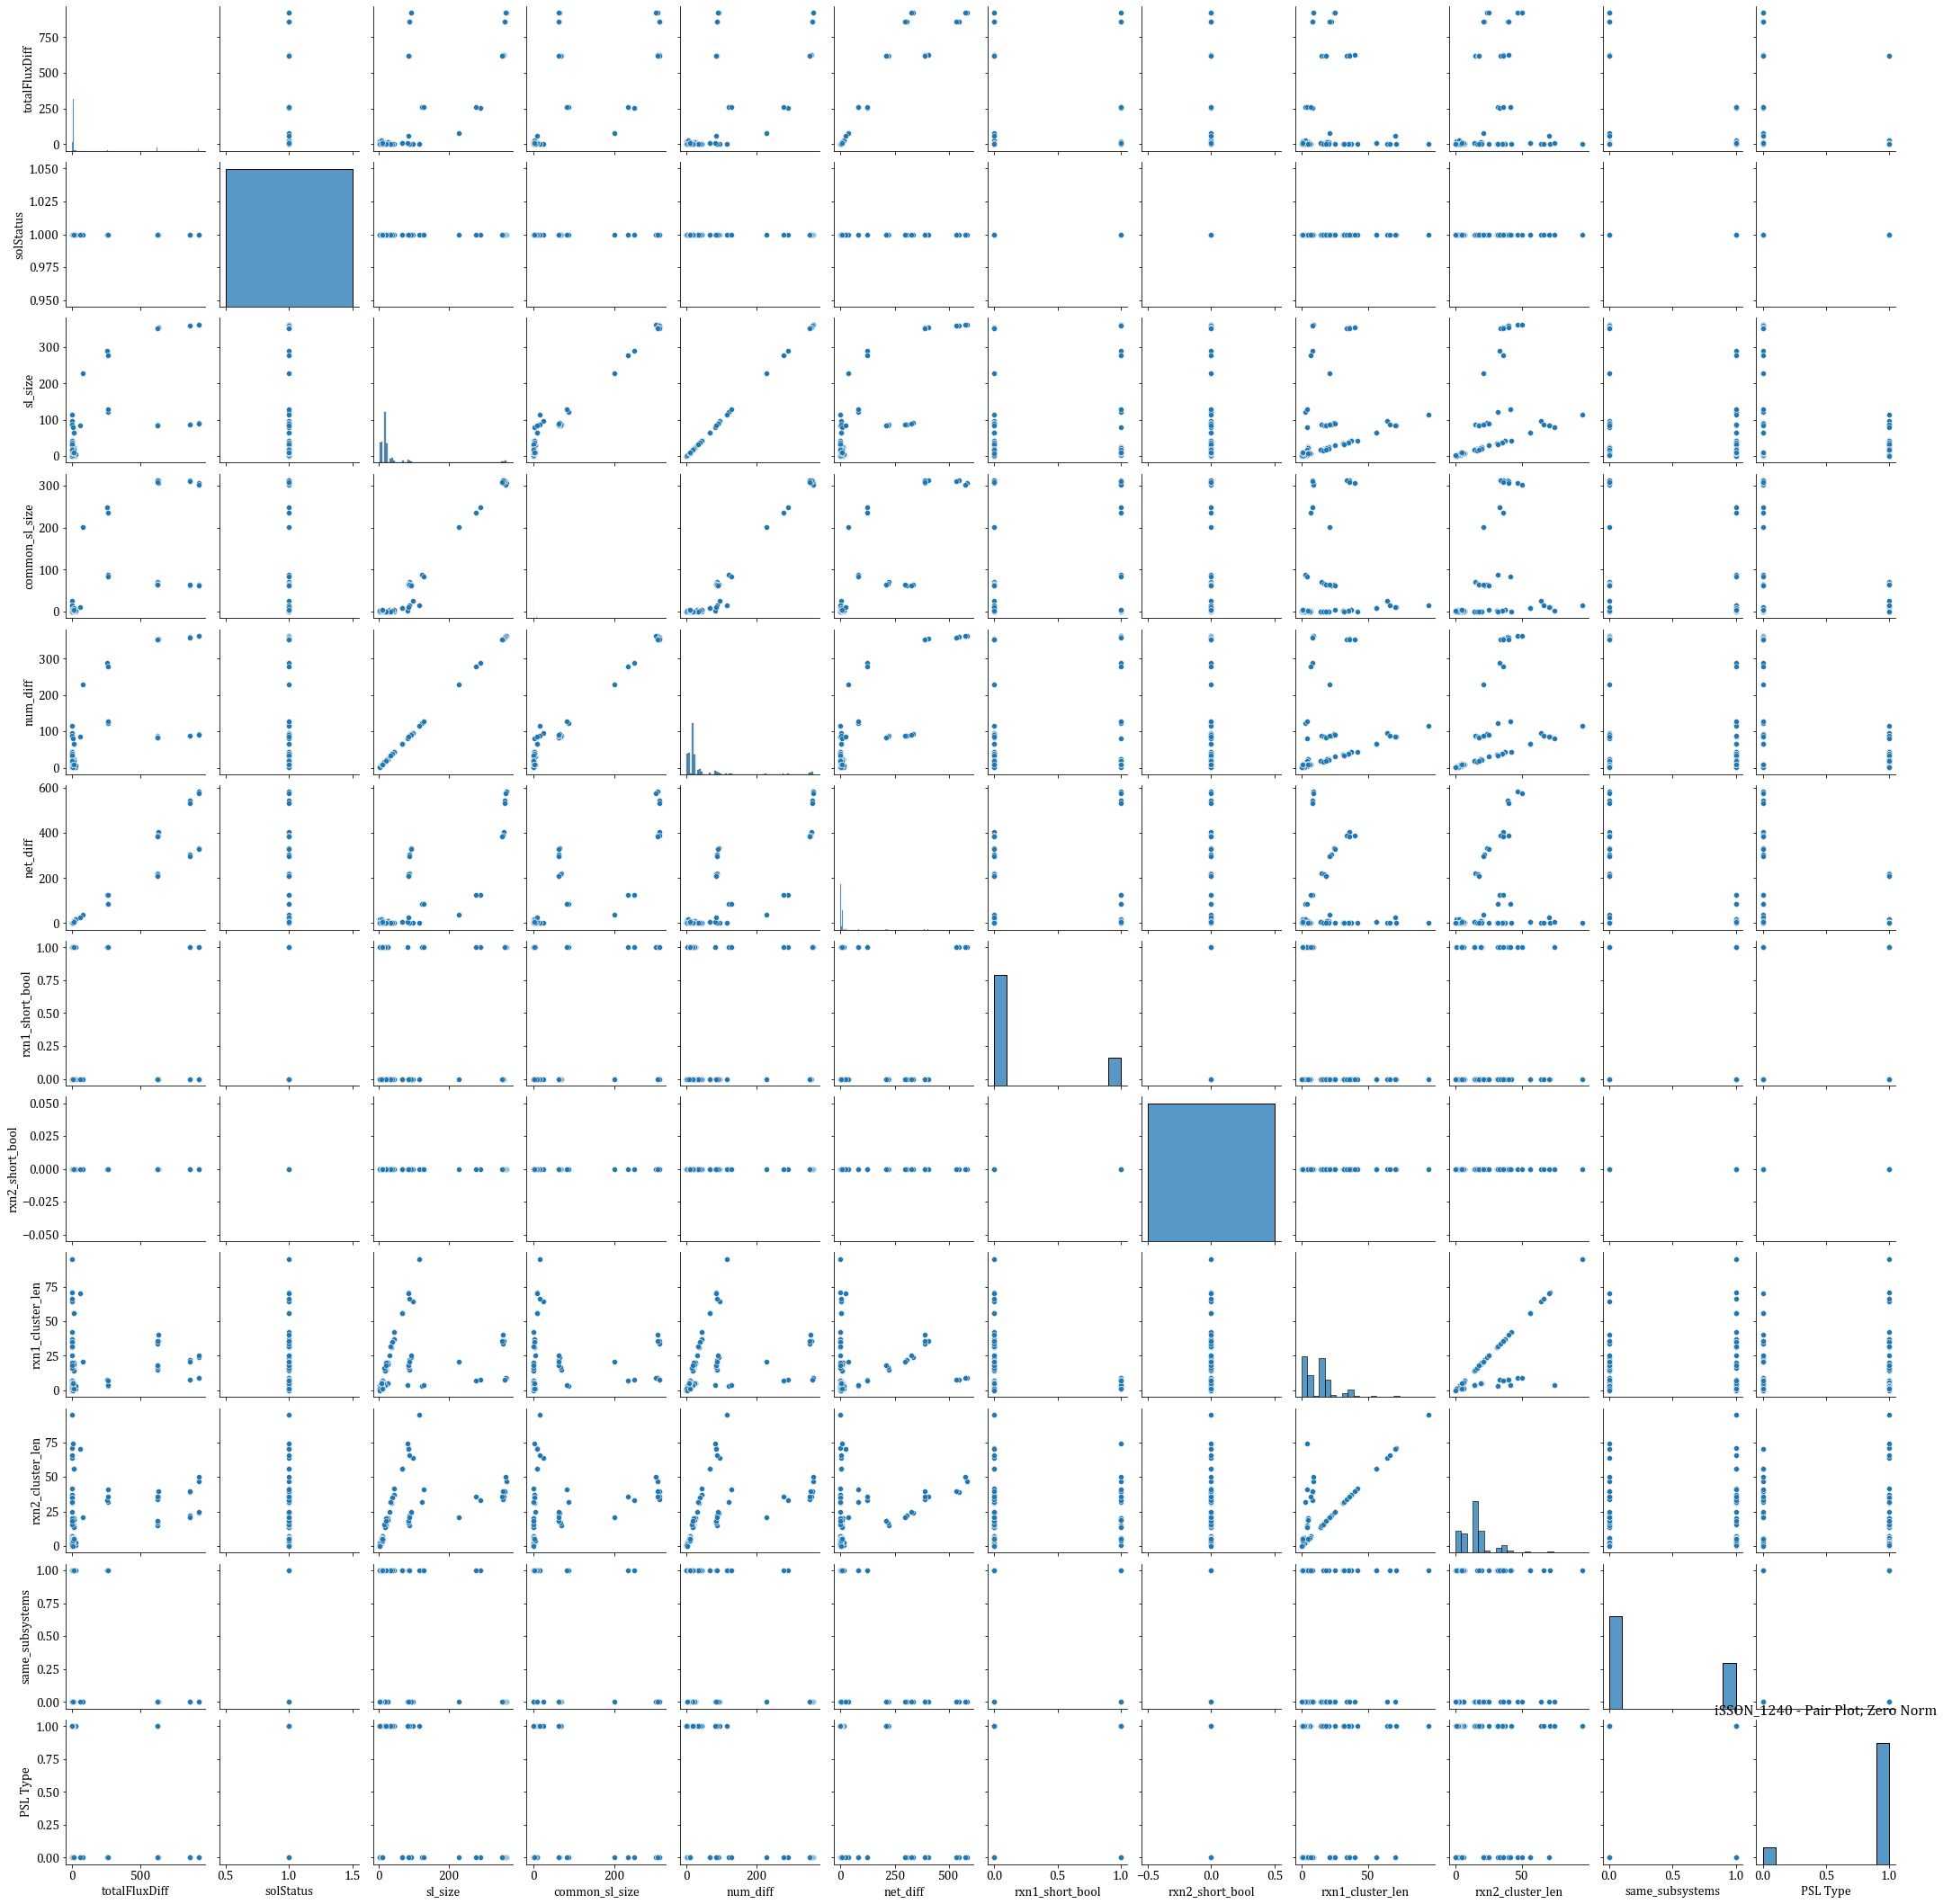

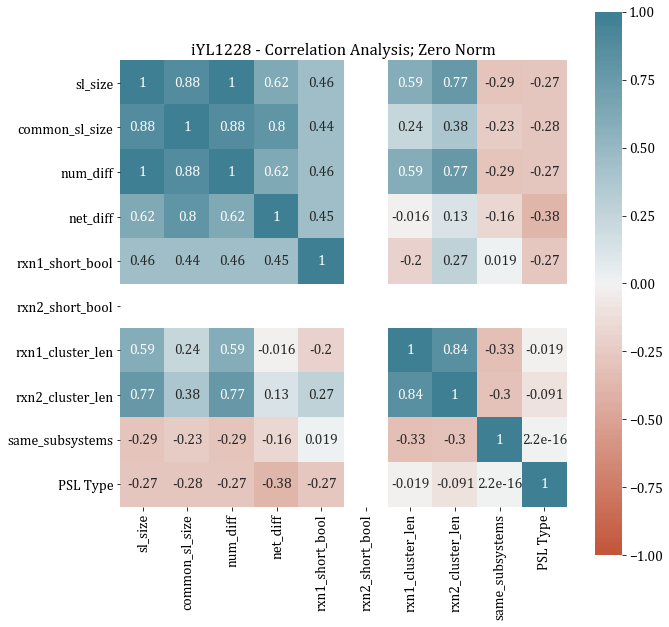

<Figure size 432x288 with 0 Axes>

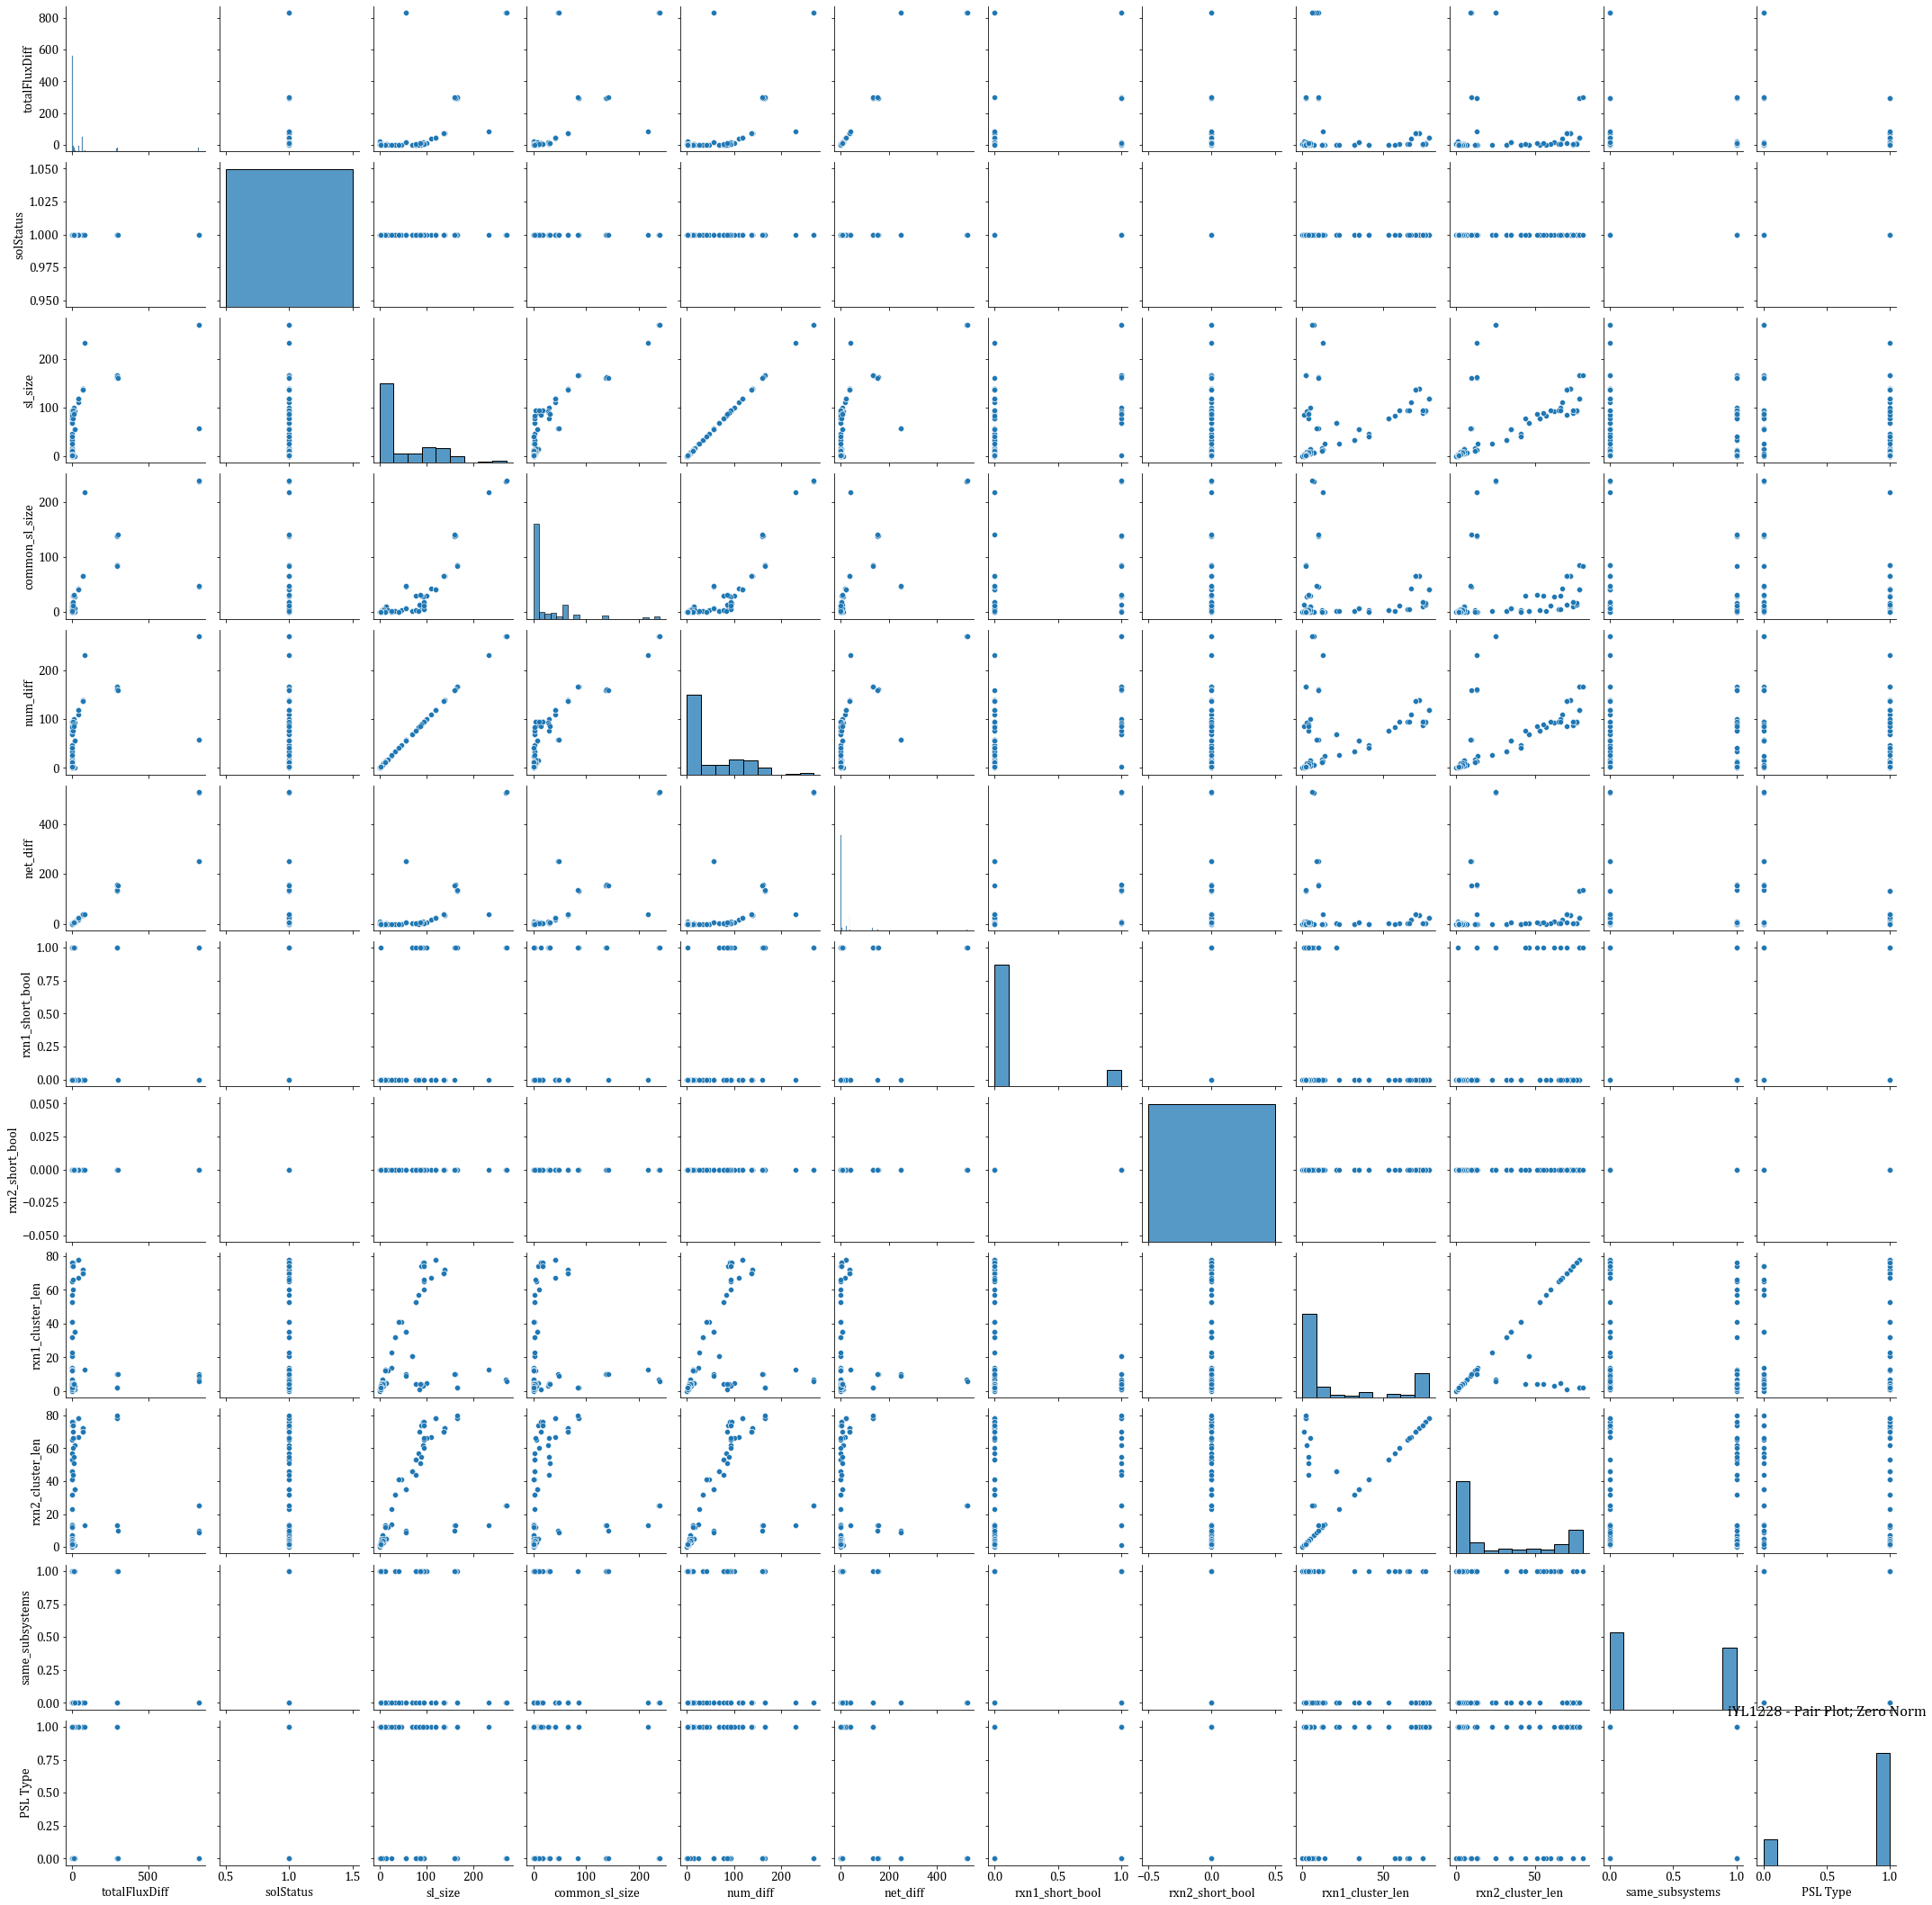

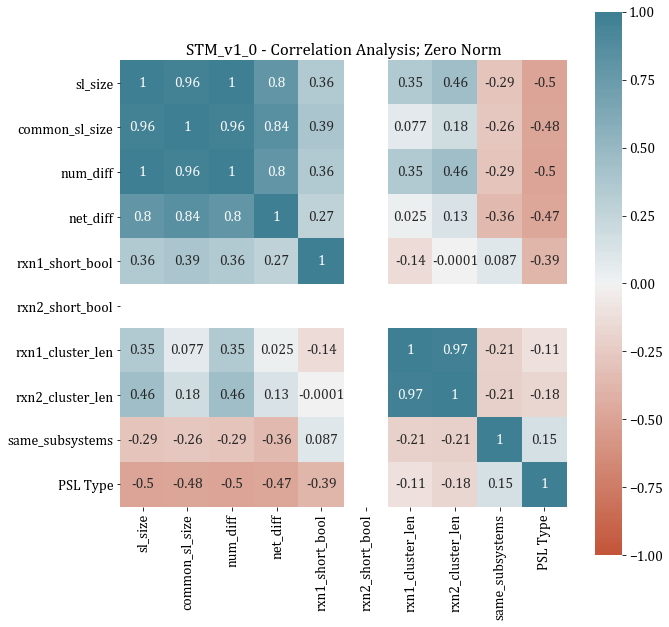

<Figure size 432x288 with 0 Axes>

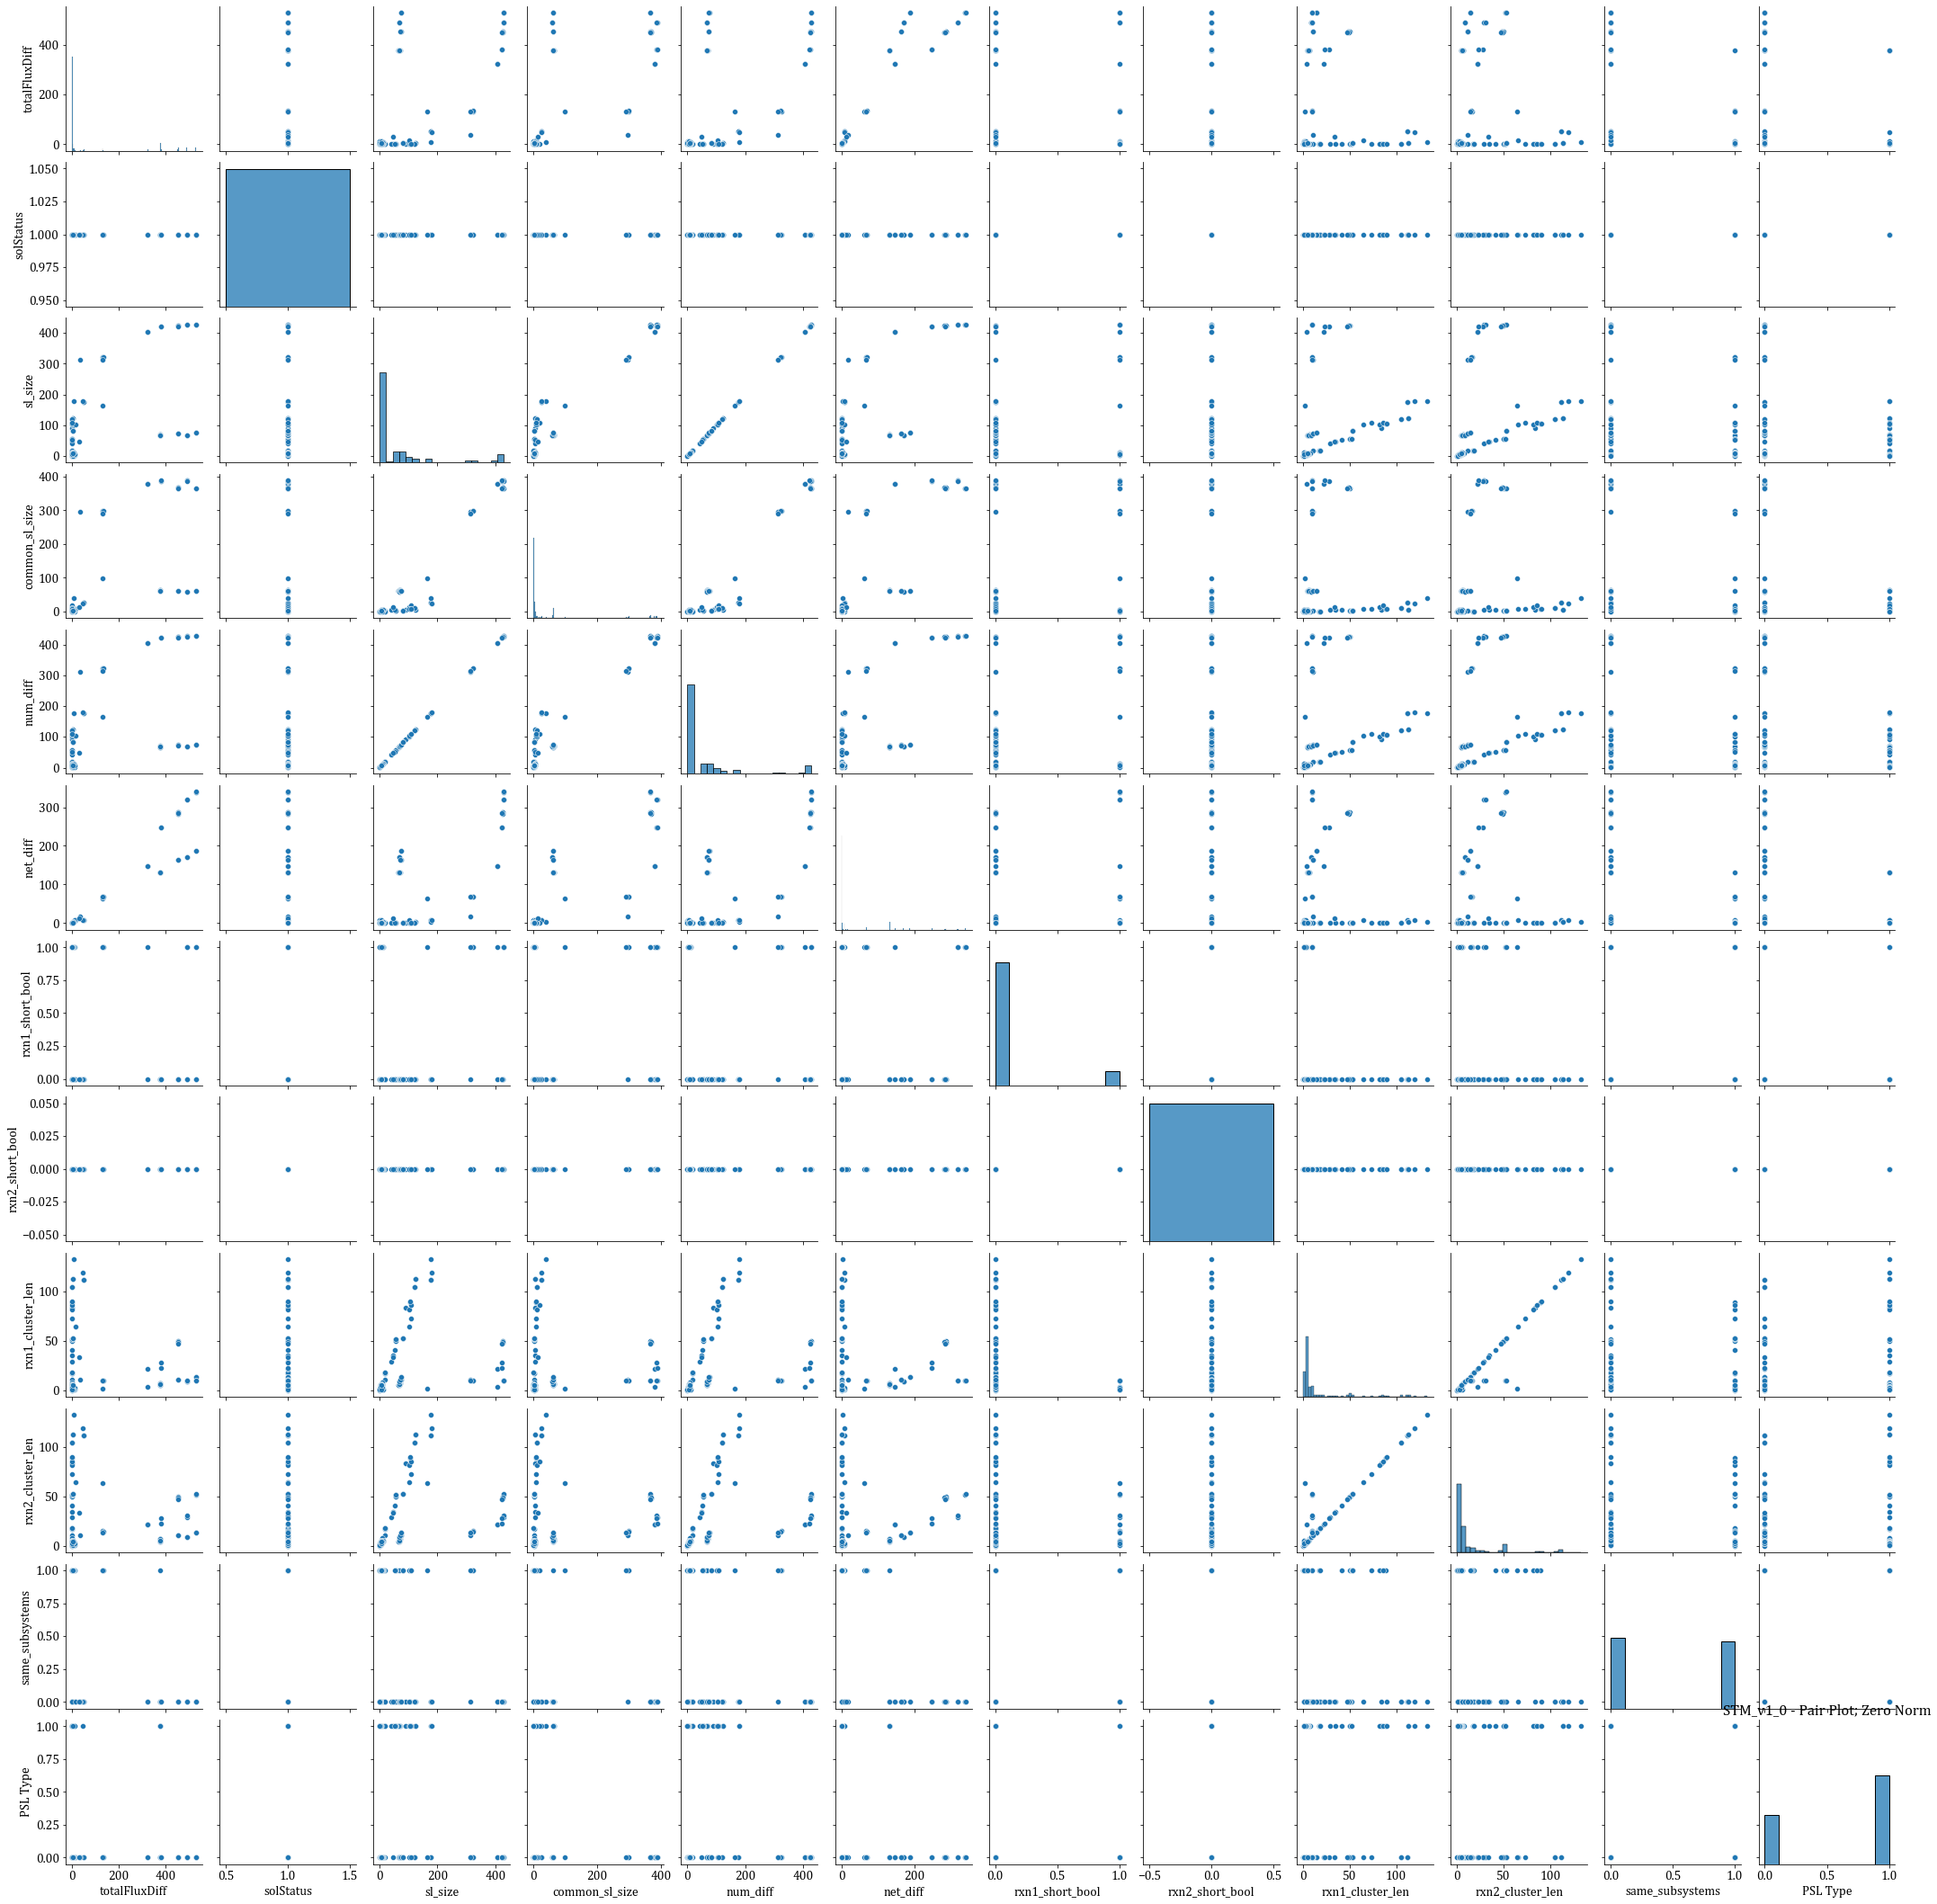

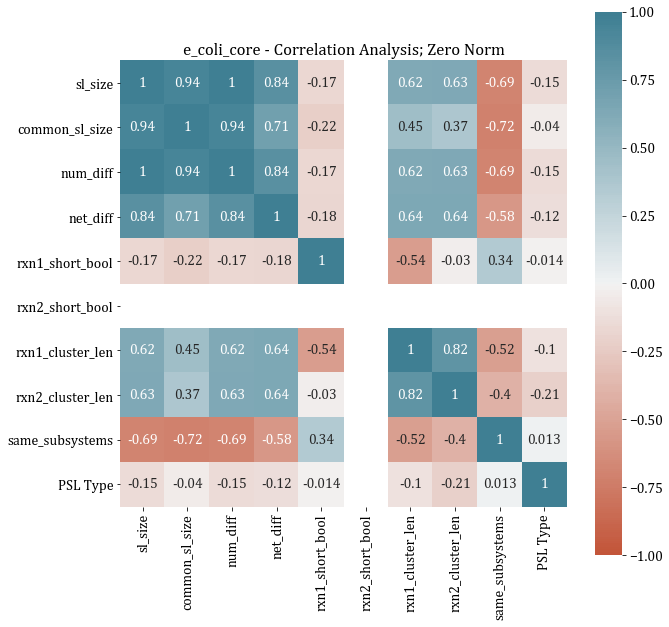

<Figure size 432x288 with 0 Axes>

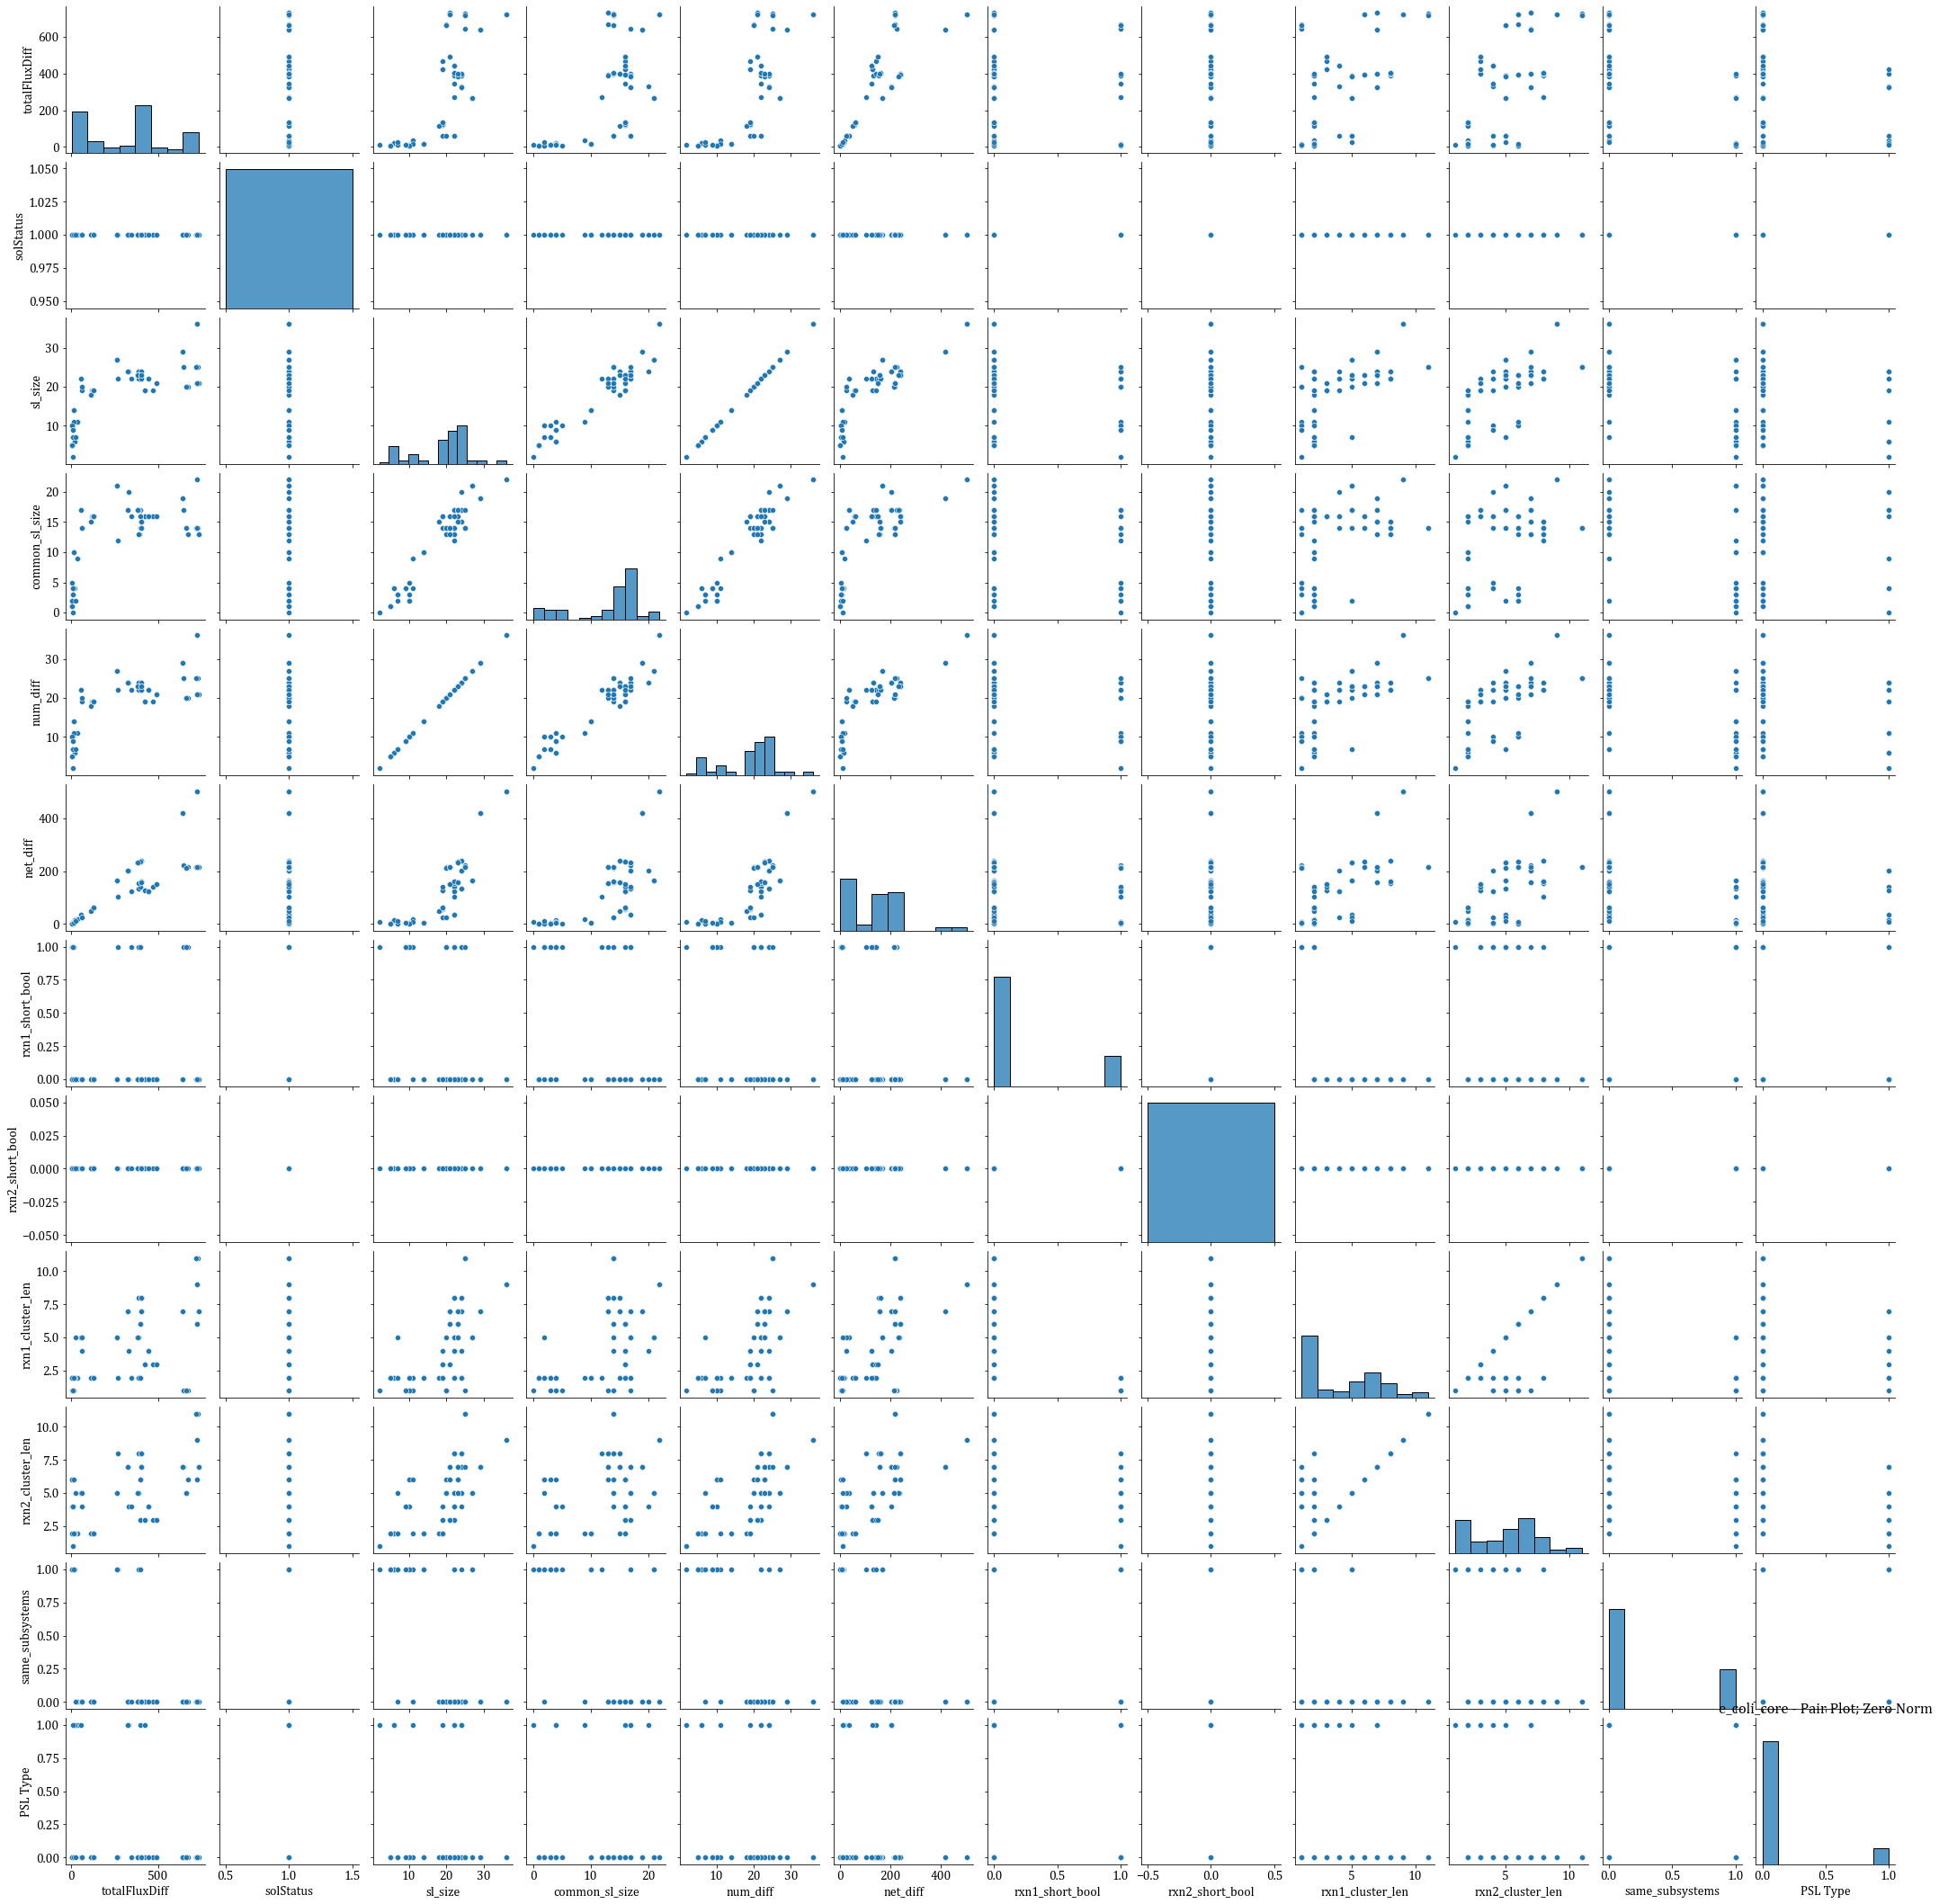

In [3]:
from utils import *

models = ['iIT341', 'iJO1366', 'iML1515', 'iNJ661', 'iPC815', 'iSSON_1240', 'iYL1228', 'STM_v1_0', 'e_coli_core']

for model in models:
    norm = "zero"
    mat = loadmat("../results/" + model + "/Castle_" + norm + "_norm.mat")
    
    # Get the minRe data
    data = mat["data"][0][0][-1][0]
    df = preprocess(data)
    df["Organism"] = model

    def find_if_in(cols):
        # print(cols[0], cols[1], cols[0] in cols[1])
        if cols[0] in cols[1]:
            return True
        else:
            return False

    def get_length(cols):
        # cols[0] is the bool array
        #     - True when rxn1 is a part of PathShort
        #     - False when rxn1 is not a part of PathShort
        # cols[1] is PathShort
        # cols[2] is PathLong   
        if cols[0]:
            return len(cols[1])
        else:
            return len(cols[2])

    df["rxn1_short_bool"] = df[["del_rxn1", "PathShort"]].apply(find_if_in, axis=1)
    df["rxn2_short_bool"] = df[["del_rxn2", "PathShort"]].apply(find_if_in, axis=1)

    df["rxn1_cluster_len"] = df[["rxn1_short_bool", "PathShort", "PathLong"]].apply(get_length, axis=1)
    df["rxn2_cluster_len"] = df[["rxn2_short_bool", "PathShort", "PathLong"]].apply(get_length, axis=1)
    
    # Lod the submodule data
    submodule_df = pd.read_csv("../results/" + model + "/" + model +'_submodules.csv', index_col=0)
    df["Subsystem 1"] = submodule_df["Subsystem 1"]
    df["Subsystem 2"] = submodule_df["Subsystem 2"]
    df["same_subsystems"] = (df["Subsystem 1"] == df["Subsystem 2"])
    
    # Load the PSL, RSL data
    psl_rsl_df = pd.read_csv("../results/" + model + "/" + model + "_PSL_RSL_one_norm_100.csv", index_col=0)
    df["Rxn_1_Type"] = psl_rsl_df["Rxn_1_Type"]
    df["Rxn_2_Type"] = psl_rsl_df["Rxn_2_Type"]
    df["PSL RSL Type"] = psl_rsl_df["Type"]
    
    df["PSL Type"] = (df["PSL RSL Type"] == "PSL")
    
    df.to_csv("../results/" + model + "/" + model + "_correlation_study.csv")
    # display(df)
    
    selected_df = df[['sl_size', 'common_sl_size', 'num_diff', 'net_diff', \
                  'rxn1_short_bool', 'rxn2_short_bool', 'rxn1_cluster_len', \
                  'rxn2_cluster_len', 'Subsystem 1', 'Subsystem 2', \
                  'same_subsystems', 'PSL Type']]
    
    plt.figure(figsize=(10,10))
    sns.heatmap(selected_df.corr(), vmin=-1, vmax=1, center=0, \
                cmap=sns.diverging_palette(20, 220, n=200), square=True, \
                annot=True)
    plt.title(model + " - Correlation Analysis; Zero Norm")
    plt.savefig("../results/zero_norm" + model + "_correlation_heatmap.png")
    plt.show()
    
    plt.figure()
    sns.pairplot(df)
    plt.title(model + " - Pair Plot; Zero Norm")
    plt.show()